In [180]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv


# Introduction


Supply Chain Optimization

# Importing Data

In [181]:
# All necessary import 
import pandas as pd
import dateutil.parser
import numpy as np
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
from sklearn import model_selection
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix


In [182]:
#Importing Dataset using pandas
df=pd.read_csv("../input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv",encoding_errors="ignore")
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Data Cleaning


In [184]:
df.shape
# 180159 records and 53 colums (180k transactions 
# from supply chains used by the company DataCo Global for 3 years)

(180519, 53)

In [185]:
# Missing values
df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [186]:
#   - Drop rows with too many missing values
df.dropna(thresh=len(df.columns) - 2, inplace=True)

In [187]:
# numerical_features = [f for f in df.columns if df[f].dtypes!='O']
# cat_features = [c for c in df.columns if df[c].dtypes=='O']
# print("Numerical: ",numerical_features)
# print(" ")
# print("Categorical: ",cat_features)

The data consists of some missing values from Customer Lname, Product Description, Order Zipcode and, Customer Zipcode which should be removed or replaced before proceeding with the analysis. And also, since there is a chance different customers might have the same first name or same last name a new column with ‘customer full name’ is created to avoid any ambiguities.

In [188]:
df.drop("Product Description",axis=1,inplace=True)
df.drop("Order Zipcode",axis=1,inplace=True)
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastn,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastn,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Shanghi,CLOSED,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Osaka,COMPLETE,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Australia del Sur,PENDING,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Australia del Sur,PENDING_PAYMENT,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [189]:
numerical_features = df.select_dtypes(exclude='object').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

print("Numerical:", numerical_features)
print(" ")
print("Categorical:", categorical_features)

Numerical: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price', 'Product Status']
 
Categorical: ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Image', 'Product Name', 'shipping date (DateOrders)', 'Shippi

In [190]:
# Impute missing values
for feature in numerical_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

for feature in categorical_features:
    df[feature].fillna('missing', inplace=True)

/tmp/ipykernel_30/3575033234.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_30/3575033234.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

## Dropping unused

In [191]:
# Unique values for cat
for column in categorical_features:
    print(f"Column: {column}")
    print(f"Unique Values: {df[column].unique()}\n")

Column: Type
Unique Values: ['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']

Column: Delivery Status
Unique Values: ['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']

Column: Category Name
Unique Values: ['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']

Column: Customer C

In [192]:
unique_count_customer = df['Customer Id'].nunique(dropna=False)
print(f'There are {unique_count_customer} unique customers.')

unique_count_orderid = df['Order Id'].nunique(dropna=False)
print(f'There are {unique_count_orderid} unique orders.')


unique_count_pid = df['Product Card Id'].nunique(dropna=False)
print(f'There are {unique_count_pid} unique products.')

There are 20641 unique customers.
There are 65741 unique orders.
There are 118 unique products.


In [193]:
# Drop some unused
df['Customer Full Name'] = df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str)

df.drop("Customer Email",axis=1,inplace=True)
df.drop("Customer Fname",axis=1,inplace=True)
df.drop("Customer Lname",axis=1,inplace=True)
df.drop("Customer Password",axis=1,inplace=True)
df.drop("Product Image", axis=1,inplace=True)
# df.drop("Product Description", axis=1,inplace=True)
# df.drop("Order Zipcode", axis=1,inplace=True)
# maybe more

In [194]:
df['Customer Zipcode']=df['Customer Zipcode'].fillna(0)#Filling NaN columns with zero

In [195]:
# # change name
# df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order date (DateOrders)'])
# df_cleaned['shipping_date']=pd.to_datetime(df_cleaned['shipping date (DateOrders)'])
# # Handling Time and date variables
# df_cleaned['order_year'] = pd.DatetimeIndex(df_cleaned['order_date']).year
# df_cleaned['order_month'] = pd.DatetimeIndex(df_cleaned['order_date']).month
# df_cleaned['order_day'] = pd.DatetimeIndex(df_cleaned['order_date']).day
# df_cleaned['shipping_year'] = pd.DatetimeIndex(df_cleaned['shipping_date']).year
# df_cleaned['shipping_month'] = pd.DatetimeIndex(df_cleaned['shipping_date']).month
# df_cleaned['shipping_day'] = pd.DatetimeIndex(df_cleaned['shipping_date']).day

In [196]:
# #   - Identify and remove duplicates
# df_cleaned.drop_duplicates(inplace=True)

In [197]:
df_cleaned = df

In [198]:
df_cleaned

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastn,PENDING,1360,73,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastn,CLOSED,1360,73,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Shanghi,CLOSED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,MariaPeterson
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Osaka,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class,RonaldClark
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Australia del Sur,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class,JohnSmith
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Australia del Sur,PENDING_PAYMENT,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class,MarySmith


## Convert Data Columns to datetime objects (Feature engineering)

In [199]:
#sort
date_columns = ["order date (DateOrders)", "shipping date (DateOrders)"]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df = df.sort_values(by="order date (DateOrders)")

In [200]:
print(df['order date (DateOrders)'])
print(df['shipping date (DateOrders)'])

33833    2015-01-01 00:00:00
109322   2015-01-01 00:21:00
87884    2015-01-01 00:21:00
77011    2015-01-01 00:21:00
95938    2015-01-01 01:03:00
                 ...        
160537   2018-01-31 22:14:00
93905    2018-01-31 22:35:00
0        2018-01-31 22:56:00
52147    2018-01-31 23:17:00
17863    2018-01-31 23:38:00
Name: order date (DateOrders), Length: 180508, dtype: datetime64[ns]
33833    2015-01-03 00:00:00
109322   2015-01-04 00:21:00
87884    2015-01-04 00:21:00
77011    2015-01-04 00:21:00
95938    2015-01-06 01:03:00
                 ...        
160537   2018-02-06 22:14:00
93905    2018-02-02 22:35:00
0        2018-02-03 22:56:00
52147    2018-02-04 23:17:00
17863    2018-02-01 11:38:00
Name: shipping date (DateOrders), Length: 180508, dtype: datetime64[ns]


In [201]:
# change name
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping_date']=pd.to_datetime(df['shipping date (DateOrders)'])
# Handling Time and date variables
df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day
df['shipping_year'] = pd.DatetimeIndex(df['shipping_date']).year
df['shipping_month'] = pd.DatetimeIndex(df['shipping_date']).month
df['shipping_day'] = pd.DatetimeIndex(df['shipping_date']).day

In [202]:
# DF clean will not have order_year,month day and shipping year month day, only df have
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Shipping Mode,Customer Full Name,order_date,shipping_date,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
33833,CASH,2,4,88.790001,239.979996,Advance shipping,0,43,Camping & Hiking,Hickory,...,Standard Class,MaryMalone,2015-01-01 00:00:00,2015-01-03 00:00:00,2015,1,1,2015,1,3
109322,PAYMENT,3,4,68.250000,227.500000,Advance shipping,0,24,Women's Apparel,Chicago,...,Standard Class,DavidRodriguez,2015-01-01 00:21:00,2015-01-04 00:21:00,2015,1,1,2015,1,4
87884,PAYMENT,3,4,36.470001,107.889999,Advance shipping,0,18,Men's Footwear,Chicago,...,Standard Class,DavidRodriguez,2015-01-01 00:21:00,2015-01-04 00:21:00,2015,1,1,2015,1,4
77011,PAYMENT,3,4,91.180000,193.990005,Advance shipping,0,48,Water Sports,Chicago,...,Standard Class,DavidRodriguez,2015-01-01 00:21:00,2015-01-04 00:21:00,2015,1,1,2015,1,4
95938,CASH,5,4,60.270000,123.000000,Late delivery,1,24,Women's Apparel,San Antonio,...,Standard Class,BrianWilson,2015-01-01 01:03:00,2015-01-06 01:03:00,2015,1,1,2015,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160537,TRANSFER,6,4,-107.959999,161.869995,Late delivery,1,76,Women's Clothing,Caguas,...,Standard Class,ChavaVelez,2018-01-31 22:14:00,2018-02-06 22:14:00,2018,1,31,2018,2,6
93905,DEBIT,2,4,-126.559998,172.660004,Advance shipping,0,76,Women's Clothing,Plainfield,...,Standard Class,StaceyWeber,2018-01-31 22:35:00,2018-02-02 22:35:00,2018,1,31,2018,2,2
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Standard Class,CallyHolloway,2018-01-31 22:56:00,2018-02-03 22:56:00,2018,1,31,2018,2,3
52147,PAYMENT,4,4,1.530000,10.910000,Shipping on time,0,74,Toys,Berwyn,...,Standard Class,CherokeeCallahan,2018-01-31 23:17:00,2018-02-04 23:17:00,2018,1,31,2018,2,4


In [203]:
# All unique year values
df['Year'] = df['order date (DateOrders)'].dt.year
unique_years = df['Year'].unique()

df['shipping_year'] = df['shipping date (DateOrders)'].dt.year
unique_shipping_years = df['shipping_year'].unique()

print(f'The unique years in the order data are: {unique_years}')
print(f'The unique years in the shipping data are: {unique_shipping_years}')

# Find the earliest year
earliest_order_date = df['order date (DateOrders)'].dt.date.min()
latest_order_date = df['order date (DateOrders)'].dt.date.max()

earliest_ship_date = df['shipping date (DateOrders)'].dt.date.min()
latest_ship_date = df['shipping date (DateOrders)'].dt.date.max()

print(f'The earliest order date in the data is: {earliest_order_date}')
print(f'The latest order date in the data is: {latest_order_date}')
print(f'The earliest shipping date in the data is: {earliest_ship_date}')
print(f'The latest shipping date in the data is: {latest_ship_date}')

The unique years in the order data are: [2015 2016 2017 2018]
The unique years in the shipping data are: [2015 2016 2017 2018]
The earliest order date in the data is: 2015-01-01
The latest order date in the data is: 2018-01-31
The earliest shipping date in the data is: 2015-01-03
The latest shipping date in the data is: 2018-02-06


In [204]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Extract YearMonth from the order date for grouping
df['order_YearMonth'] = df['order date (DateOrders)'].dt.to_period('M')

# Group by YearMonth and count the orders
order_grouped2 = df.groupby('order_YearMonth')['Order Item Id'].count().reset_index()
order_grouped2 = order_grouped2.rename(columns={"Order Item Id": "Order Counts"})

# Convert YearMonth back to datetime for proper plotting
order_grouped2['order_YearMonth'] = order_grouped2['order_YearMonth'].dt.to_timestamp()

# Print the data
print(order_grouped2)

   order_YearMonth  Order Counts
0       2015-01-01          5322
1       2015-02-01          4729
2       2015-03-01          5362
3       2015-04-01          5126
4       2015-05-01          5357
5       2015-06-01          5134
6       2015-07-01          5299
7       2015-08-01          5273
8       2015-09-01          5140
9       2015-10-01          5302
10      2015-11-01          5235
11      2015-12-01          5371
12      2016-01-01          5317
13      2016-02-01          4894
14      2016-03-01          5210
15      2016-04-01          5097
16      2016-05-01          5302
17      2016-06-01          5054
18      2016-07-01          5305
19      2016-08-01          5334
20      2016-09-01          5160
21      2016-10-01          5398
22      2016-11-01          5210
23      2016-12-01          5269
24      2017-01-01          5217
25      2017-02-01          4906
26      2017-03-01          5347
27      2017-04-01          5212
28      2017-05-01          5317
29      20

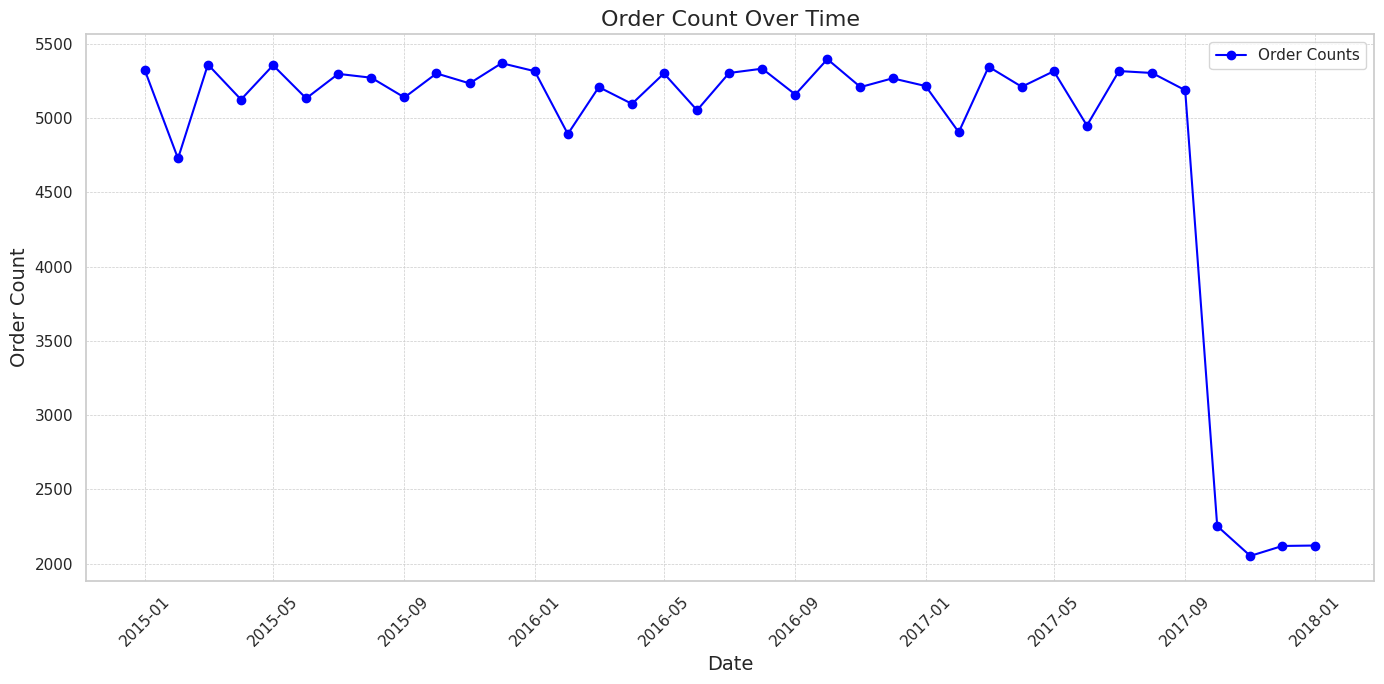

In [205]:
# Plot using Matplotlib
plt.figure(figsize=(14, 7))
plt.plot(order_grouped2['order_YearMonth'], order_grouped2['Order Counts'], marker='o', label="Order Counts", color="blue")

# Customizing the plot
plt.title("Order Count Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Order Count", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## Splitting dataset into smaller datasets for domain usage and easier modeling

1. Finance
2. Demographics
3. Shipment day estimation

In [206]:
shipment_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status']
shipment = df_cleaned[shipment_features]
shipment.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping


In [207]:
finance_features=['Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate',
                  'Order Item Product Price','Order Item Profit Ratio']
finance = df_cleaned[finance_features]
finance.head()

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio
0,91.250000,314.640015,13.110000,0.04,327.75,0.29
1,-249.089996,311.359985,16.389999,0.05,327.75,-0.80
2,-247.779999,309.720001,18.030001,0.06,327.75,-0.80
3,22.860001,304.809998,22.940001,0.07,327.75,0.08
4,134.210007,298.250000,29.500000,0.09,327.75,0.45


# Data Visualization

In [208]:
df1=df_cleaned.copy()

In [209]:
df1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.750000,0,2018-02-03 22:56:00,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastn,PENDING,1360,73,Smart watch,327.750000,0,2018-01-18 12:27:00,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastn,CLOSED,1360,73,Smart watch,327.750000,0,2018-01-17 12:06:00,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,Smart watch,327.750000,0,2018-01-16 11:45:00,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.750000,0,2018-01-15 11:24:00,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Shanghi,CLOSED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 03:40:00,Standard Class,MariaPeterson
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Osaka,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-19 01:34:00,Second Class,RonaldClark
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Australia del Sur,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 21:00:00,Standard Class,JohnSmith
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Australia del Sur,PENDING_PAYMENT,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-18 20:18:00,Standard Class,MarySmith


## Data Distribution 

### Numerical Features Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

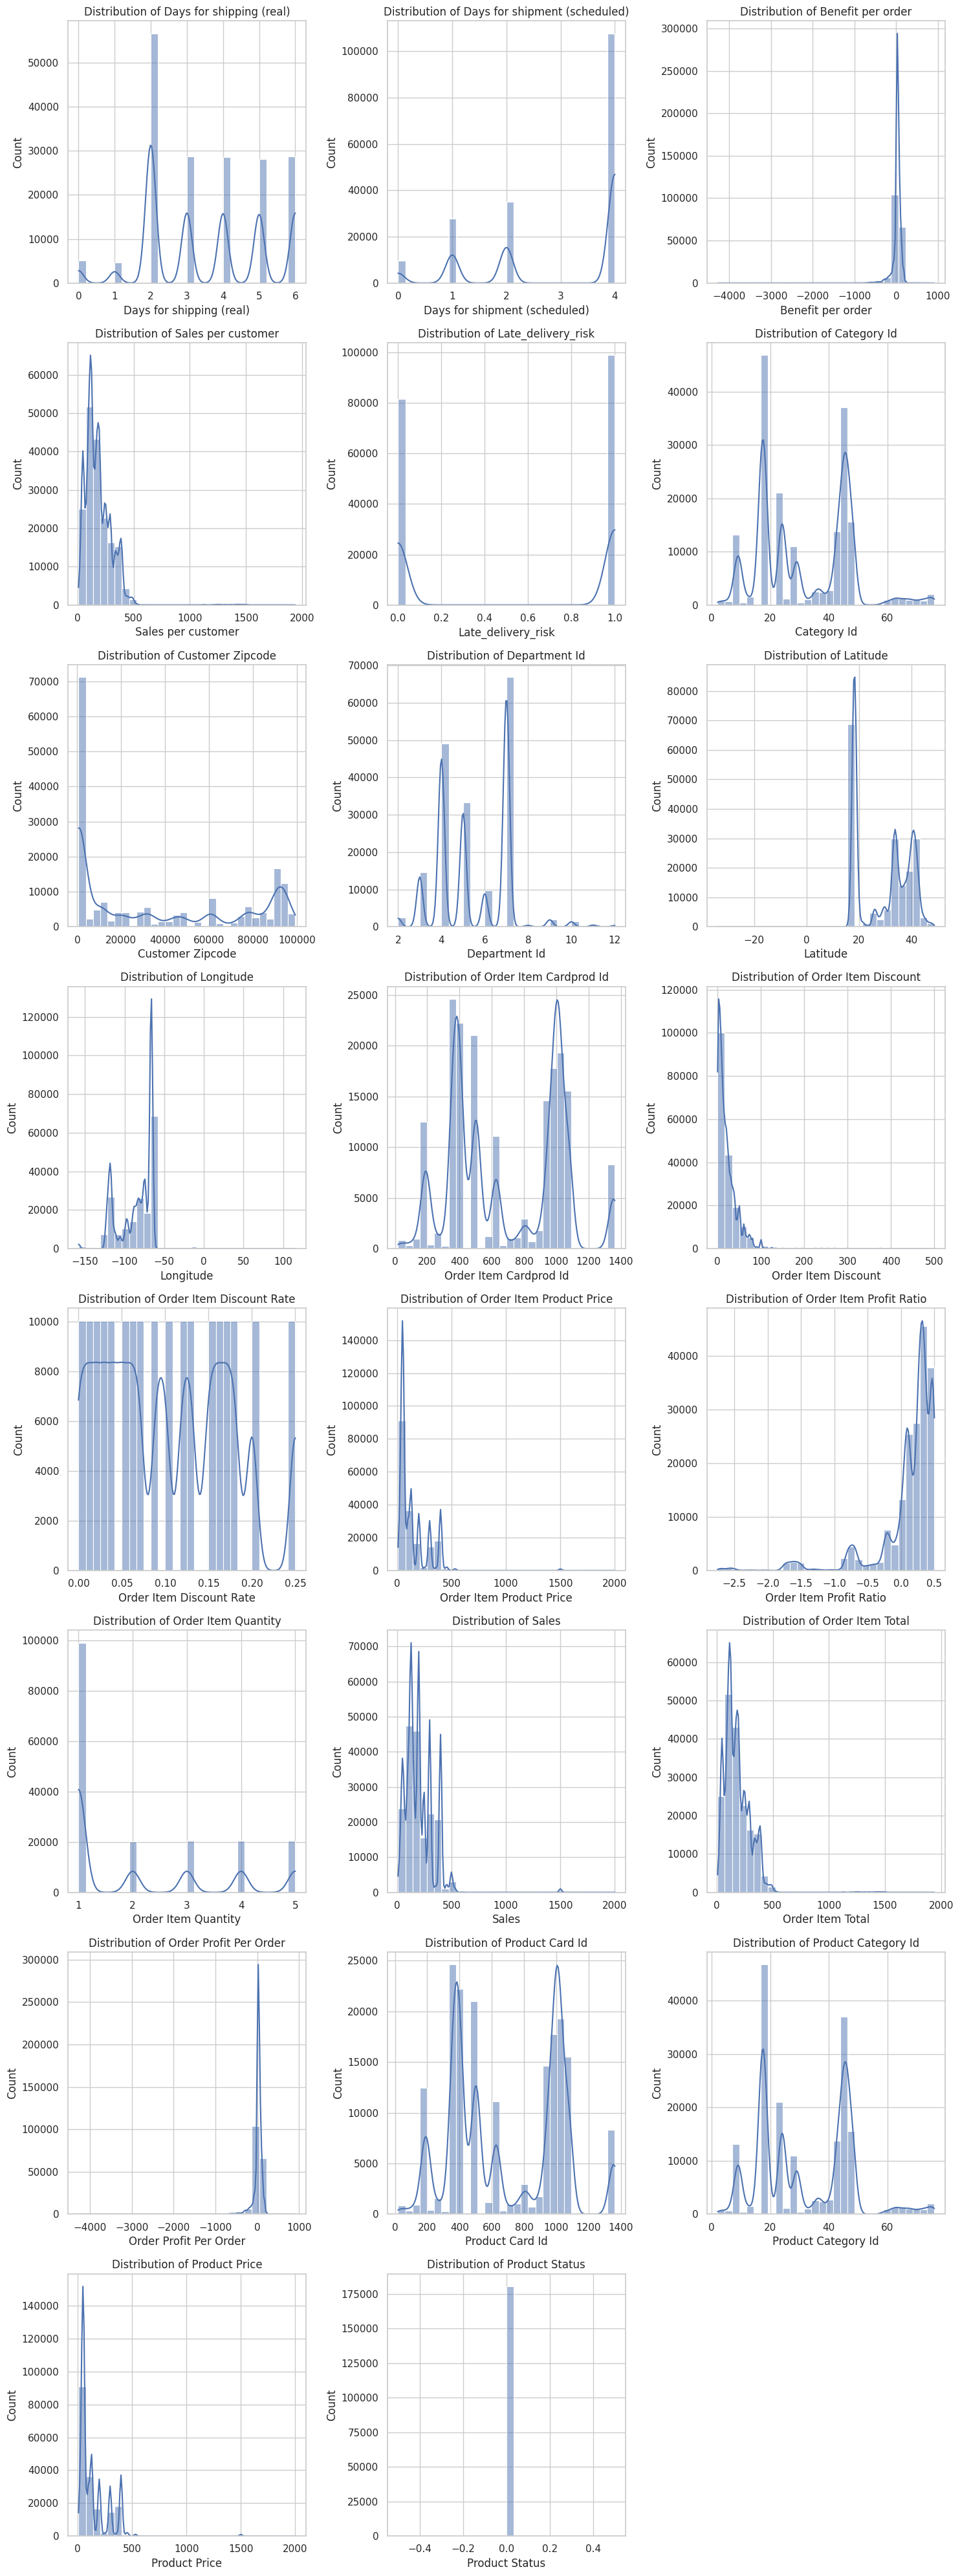

In [210]:
# 
numerical_data = df1.select_dtypes(include=[np.number]).drop(columns=['Order Id', 'Order Customer Id',
                                                                    'Customer Id', 'Order Item Id'])

num_cols = numerical_data.shape[1]
n_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(numerical_data.columns):
    plt.subplot(n_rows, 3, idx + 1)
    sns.histplot(numerical_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

### Categorical Features Analysis

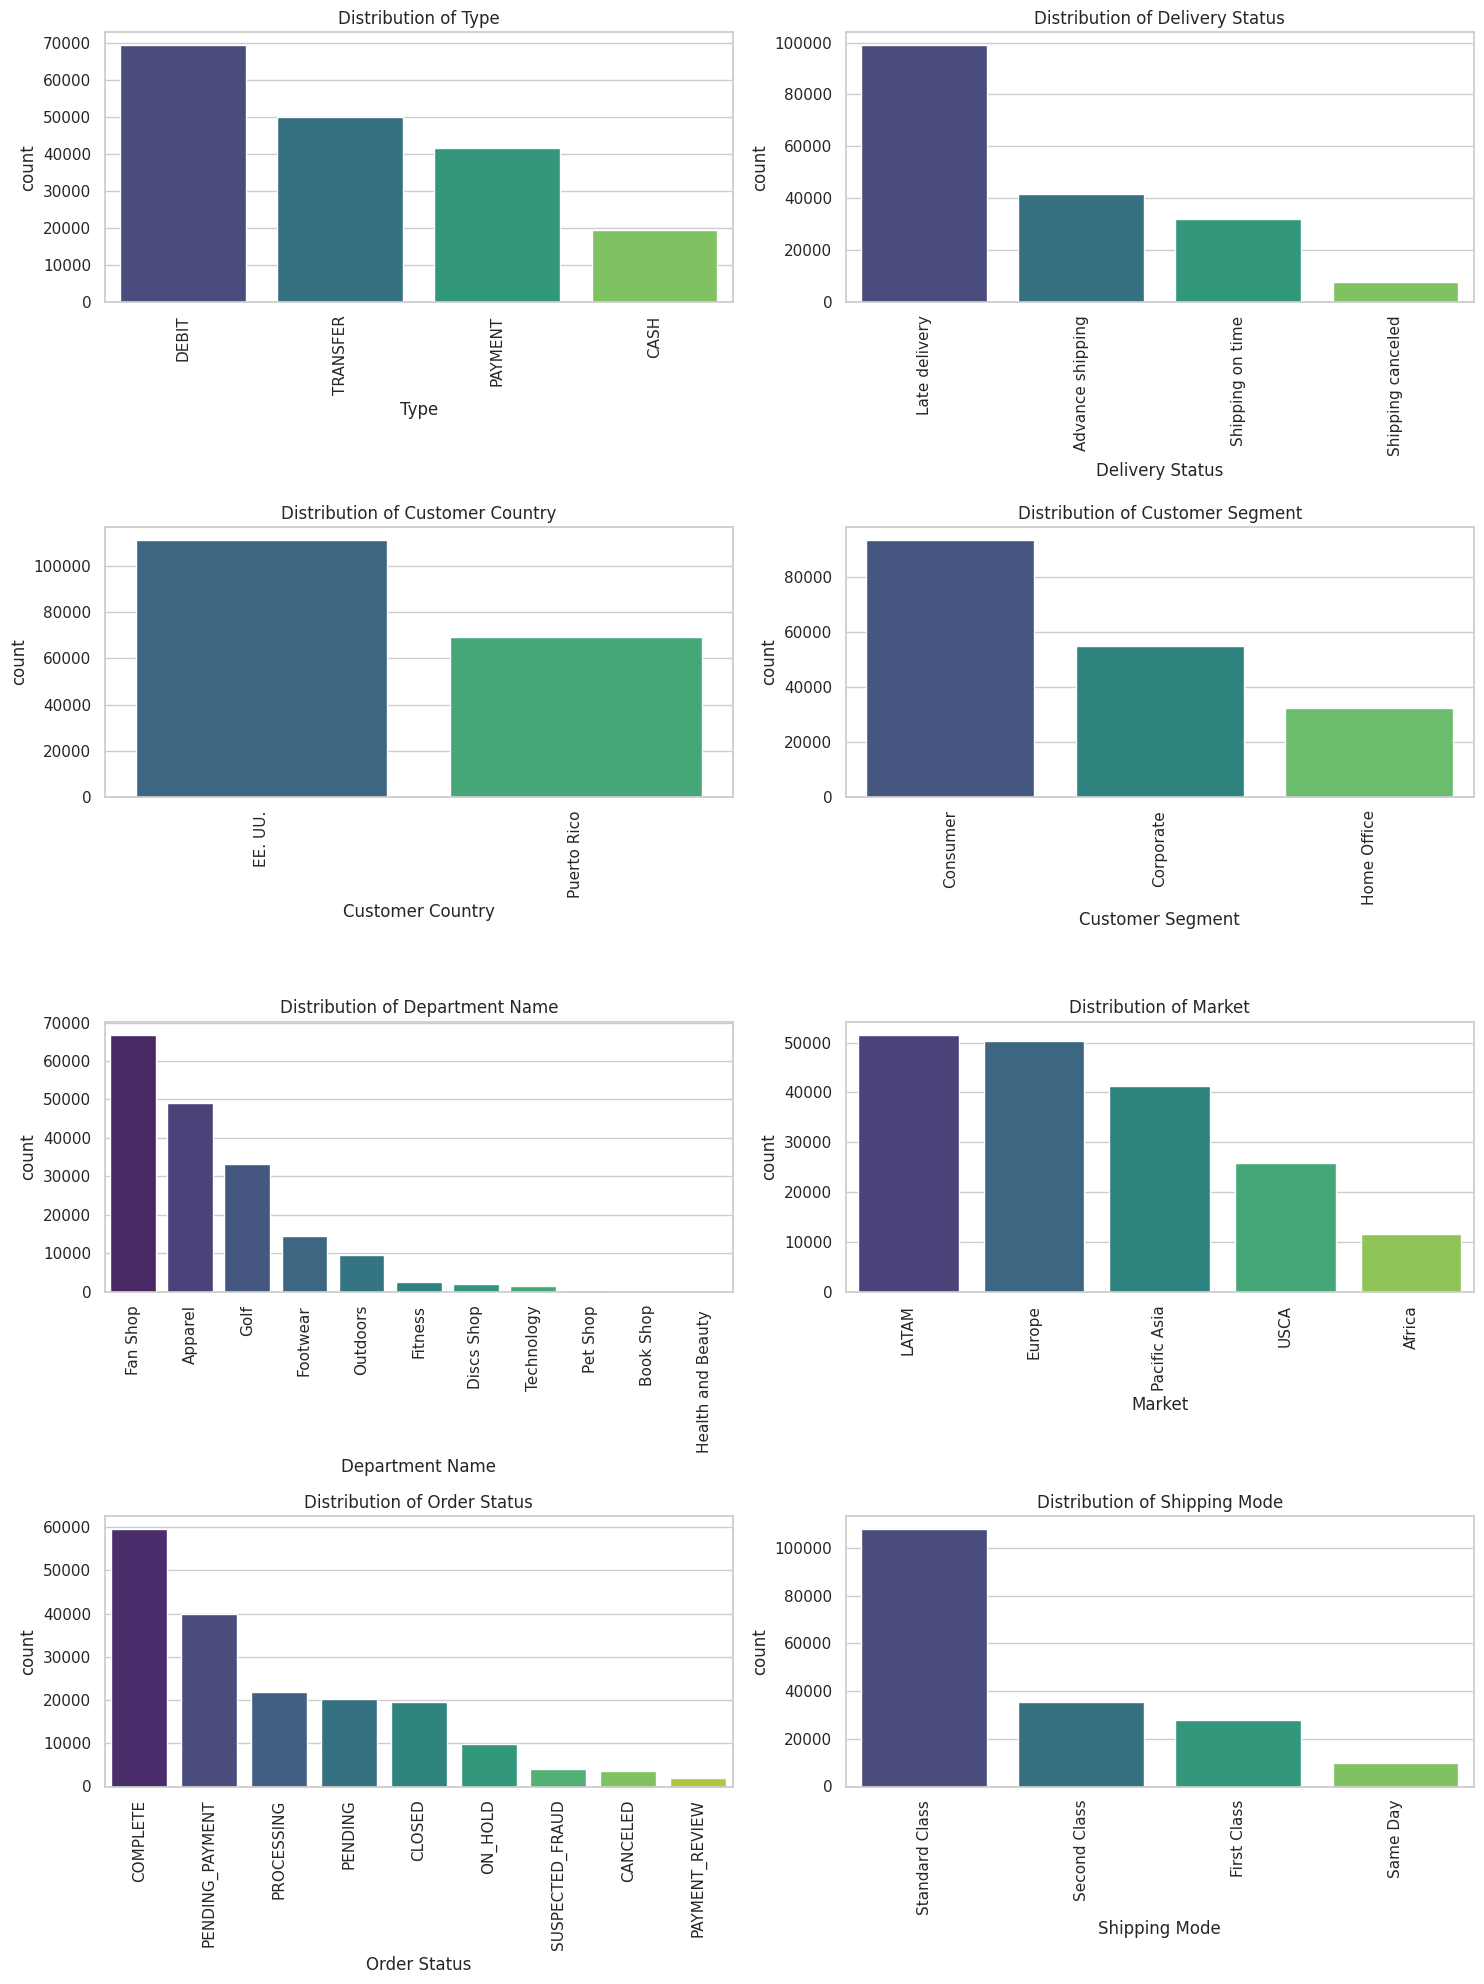

In [211]:
categorical_data = df1.select_dtypes(include=['object']).drop(columns=['Customer City',  'Customer Street',
                    'Order City', 'Order State', 'Product Name', 'Category Name', 'Customer State', 
                    'Order Country', 'Order Region', 'Customer Full Name'])

num_cols = categorical_data.shape[1]
n_rows = (num_cols // 2) + (num_cols % 2 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(categorical_data.columns):
    plt.subplot(n_rows, 2, idx + 1)
    sns.countplot(x=categorical_data[col], palette="viridis", order=categorical_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90) 
    plt.tight_layout()

plt.show()

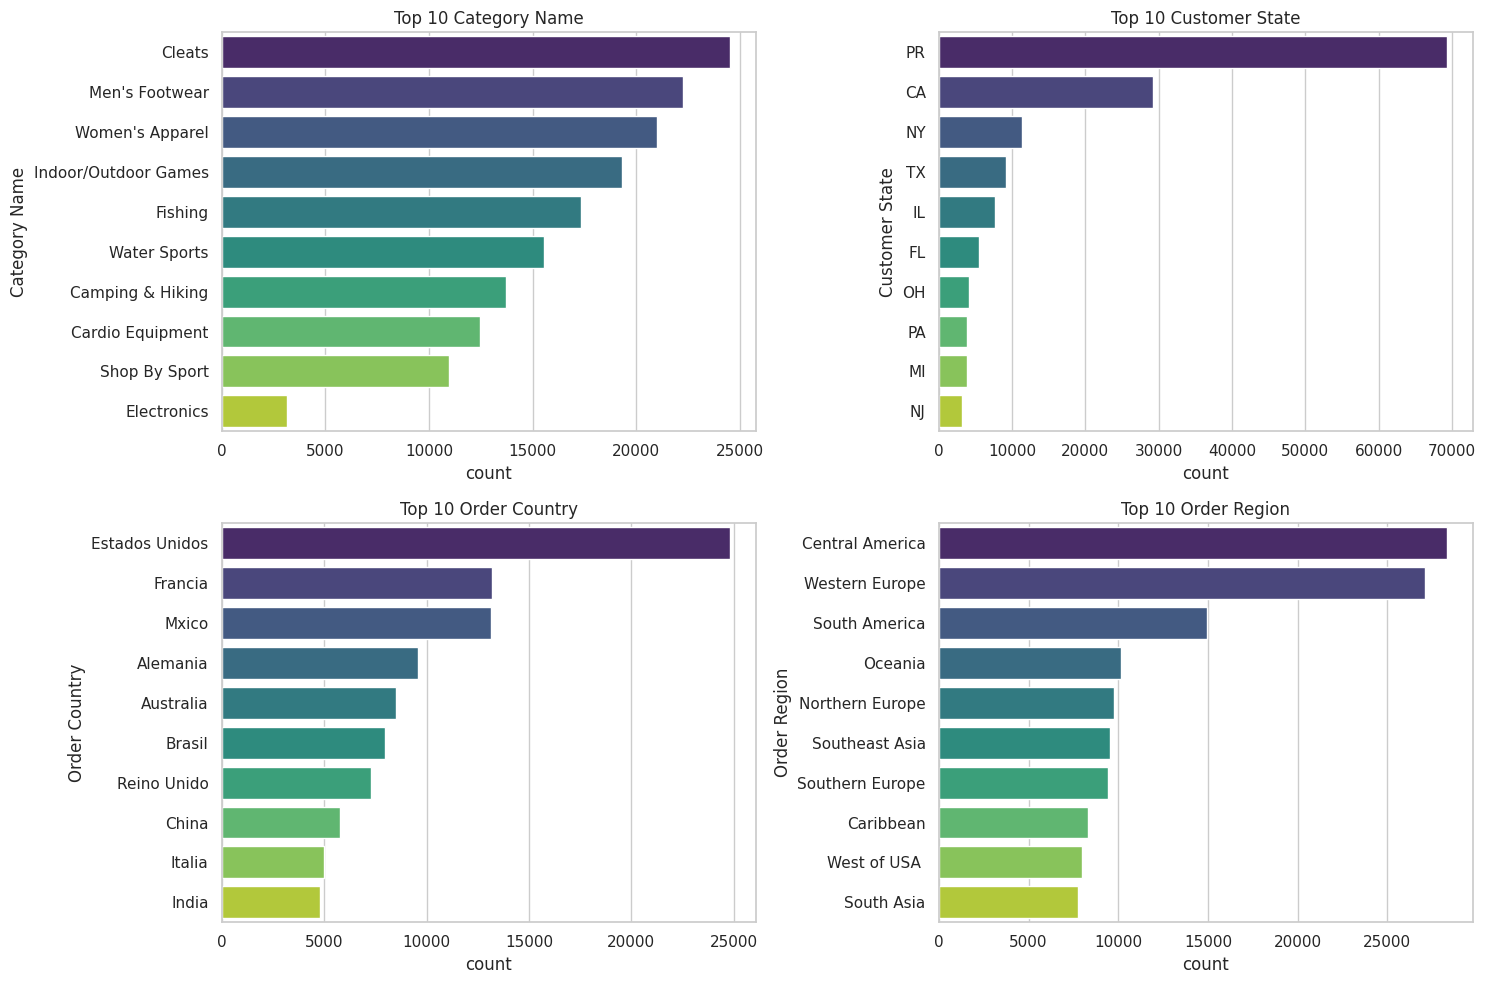

In [212]:
# Select the categorical columns that have more than 10 distinct values
categorical_data2 = df[['Category Name', 'Customer State', 'Order Country', 'Order Region']]

num_cols = categorical_data2.shape[1]
n_rows = (num_cols // 2) + (num_cols % 2 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(categorical_data2.columns):
    plt.subplot(n_rows, 2, idx + 1)
    category_counts = categorical_data2[col].value_counts().head(10)
    sns.barplot(x=category_counts, y=category_counts.index, palette="viridis")
    plt.title(f'Top 10 {col}')
    plt.tight_layout()

plt.show()

## EDA (Sales Trend Analysis)

### Monthly and Annually sales trend

/tmp/ipykernel_30/1717958435.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_30/1717958435.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_30/1717958435.p

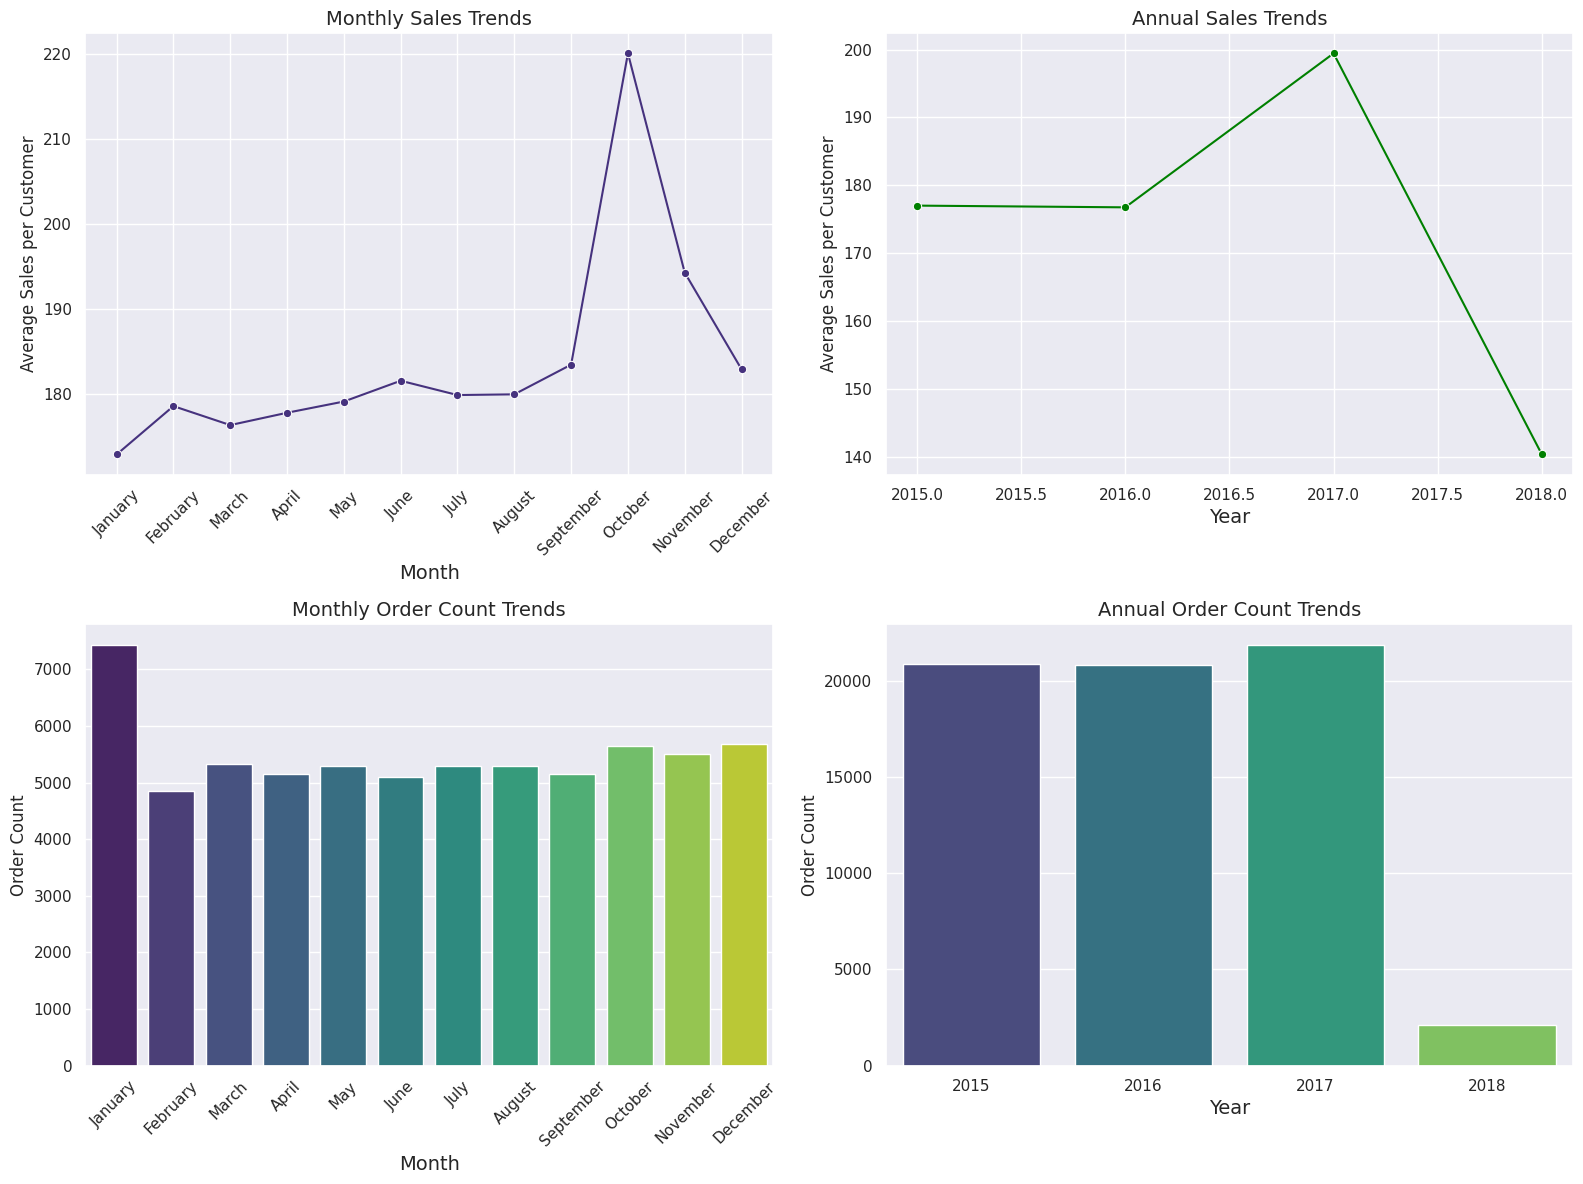

In [213]:
df1['order date (DateOrders)'] = pd.to_datetime(df1['order date (DateOrders)'])

# Extract Month Name and Year
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
df1['MonthName'] = df1['order date (DateOrders)'].dt.month_name()
df1['MonthName'] = pd.Categorical(df1['MonthName'], categories=months_in_order, ordered=True)
df1['Year'] = df1['order date (DateOrders)'].dt.year

# Grouping for monthly and annual trends
monthly_sales = df1.groupby('MonthName')['Sales per customer'].mean()
yearly_sales = df1.groupby('Year')['Sales per customer'].mean()

monthly_order_count = df1.groupby('MonthName')['Order Id'].nunique()
yearly_order_count = df1.groupby('Year')['Order Id'].nunique()

# Set Seaborn style
sns.set_palette("viridis")
sns.set_style("darkgrid")

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Monthly sales trends
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Monthly Sales Trends', fontsize=14)
axs[0, 0].set_xlabel('Month', fontsize=14)
axs[0, 0].set_ylabel('Average Sales per Customer', fontsize=12)
axs[0, 0].set_xticklabels(months_in_order, rotation=45)

# Annual sales trends
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, ax=axs[0, 1], marker='o', color='green')
axs[0, 1].set_title('Annual Sales Trends', fontsize=14)
axs[0, 1].set_xlabel('Year', fontsize=14)
axs[0, 1].set_ylabel('Average Sales per Customer', fontsize=12)

# Monthly order count trends
sns.barplot(x=monthly_order_count.index, y=monthly_order_count.values, ax=axs[1, 0], palette="viridis")
axs[1, 0].set_title('Monthly Order Count Trends', fontsize=14)
axs[1, 0].set_xlabel('Month', fontsize=14)
axs[1, 0].set_ylabel('Order Count', fontsize=12)
axs[1, 0].set_xticklabels(months_in_order, rotation=45)

# Annual order count trends
sns.barplot(x=yearly_order_count.index, y=yearly_order_count.values, ax=axs[1, 1], palette="viridis")
axs[1, 1].set_title('Annual Order Count Trends', fontsize=14)
axs[1, 1].set_xlabel('Year', fontsize=14)
axs[1, 1].set_ylabel('Order Count', fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


### Monthly Business Perfomance Metric (Monthly Sales & Profit Ratio & Discount Rate Average Trend)

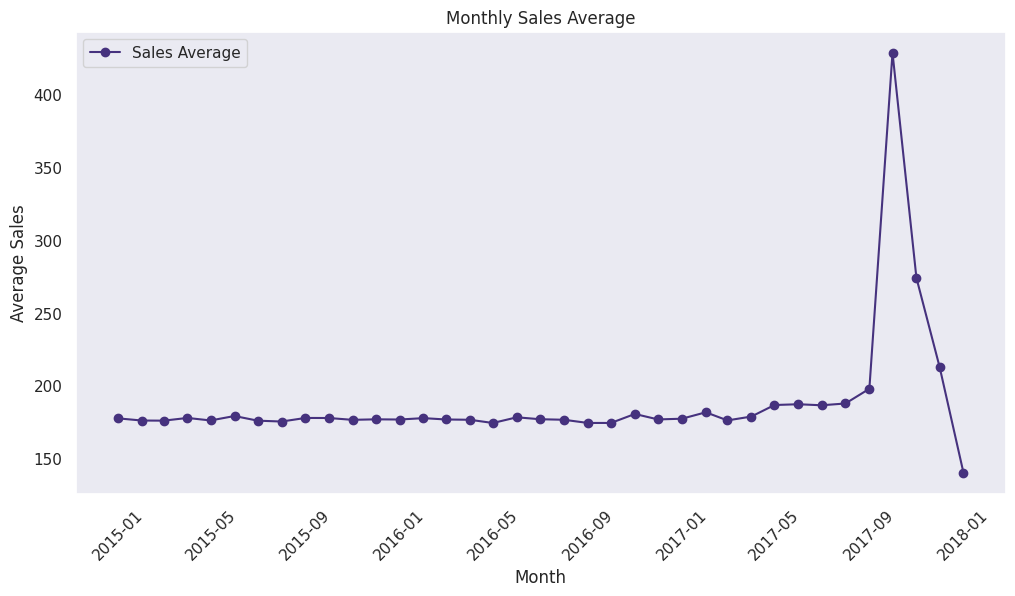

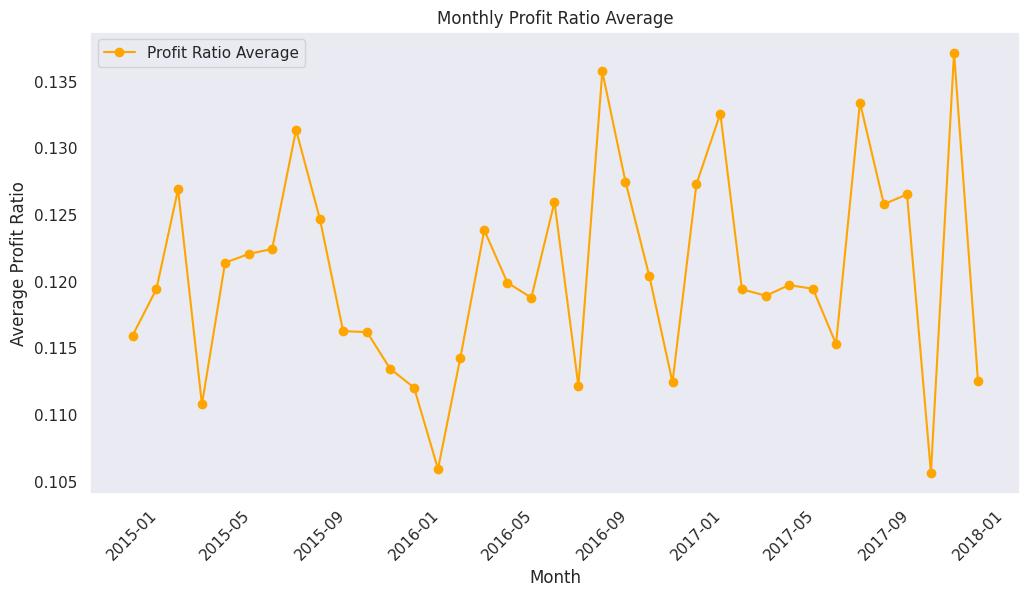

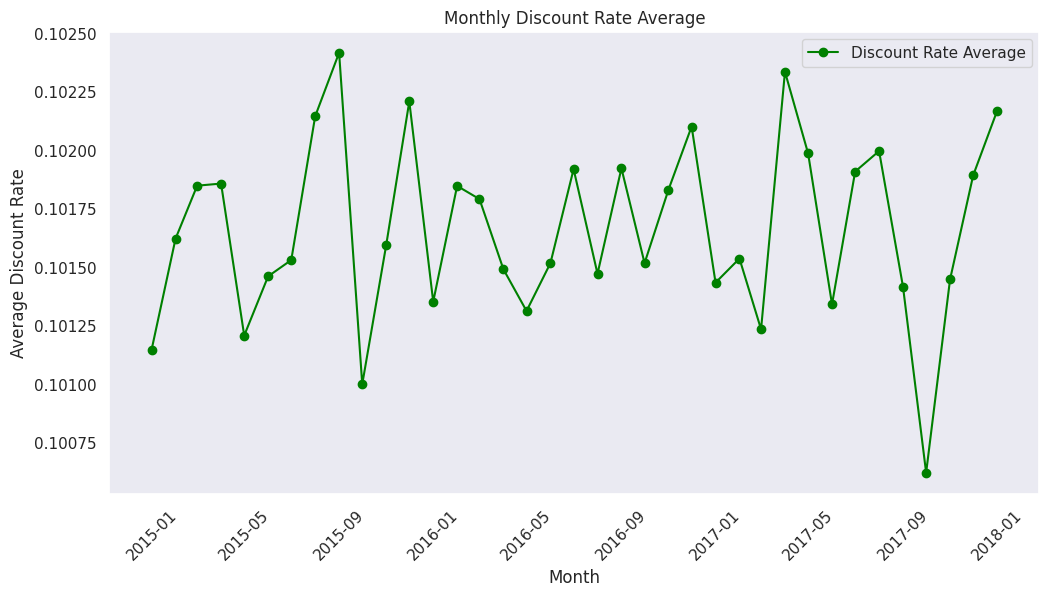

In [214]:
# Ensure the 'order date (DateOrders)' column is in datetime format
df1['order date (DateOrders)'] = pd.to_datetime(df1['order date (DateOrders)'])

# Extract year and month from the order date
df1['YearMonth'] = df1['order date (DateOrders)'].dt.to_period('M')

# Group by YearMonth and calculate metrics
monthly_metrics = df1.groupby('YearMonth').agg({
    'Sales per customer': 'mean',              # Monthly Sales Average
    'Order Item Profit Ratio': 'mean',         # Monthly Profit Ratio Average
    'Order Item Discount Rate': 'mean'         # Monthly Discount Rate Average
}).reset_index()

# Convert YearMonth back to datetime for proper plotting
monthly_metrics['YearMonth'] = monthly_metrics['YearMonth'].dt.to_timestamp()

# Plot Monthly Sales Average
plt.figure(figsize=(12, 6))
plt.plot(monthly_metrics['YearMonth'], monthly_metrics['Sales per customer'], marker='o', label="Sales Average")
plt.title("Monthly Sales Average")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

# Plot Monthly Profit Ratio Average
plt.figure(figsize=(12, 6))
plt.plot(monthly_metrics['YearMonth'], monthly_metrics['Order Item Profit Ratio'], marker='o', color='orange', label="Profit Ratio Average")
plt.title("Monthly Profit Ratio Average")
plt.xlabel("Month")
plt.ylabel("Average Profit Ratio")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

# Plot Monthly Discount Rate Average
plt.figure(figsize=(12, 6))
plt.plot(monthly_metrics['YearMonth'], monthly_metrics['Order Item Discount Rate'], marker='o', color='green', label="Discount Rate Average")
plt.title("Monthly Discount Rate Average")
plt.xlabel("Month")
plt.ylabel("Average Discount Rate")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

+ Sales per customer are stable, with an exceptional increase in Oct 2017
+ The profit ratio follows a seasonal trends, could be the result of business activities like promotions, changes in cost structure.
+ Discount rates vary significantly, suggesting active promotional or pricing adjustments

### Overview of Customer Sales and Shipping Dynamics (Distribution of Sales per customer, Distribution of Order Item Product Price, Distribution of Days for shipment (scheduled), Distribution of Days for shipping (real)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



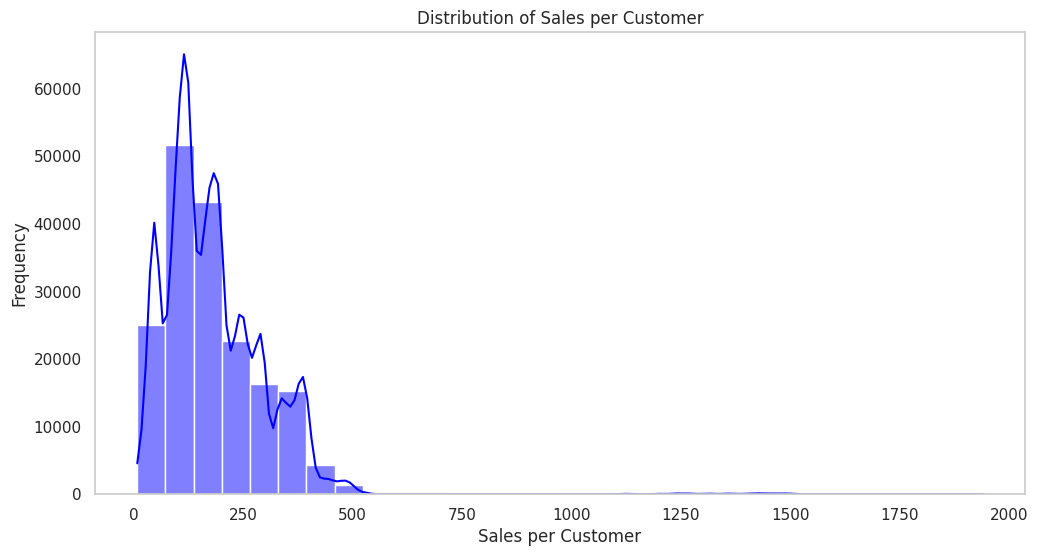

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



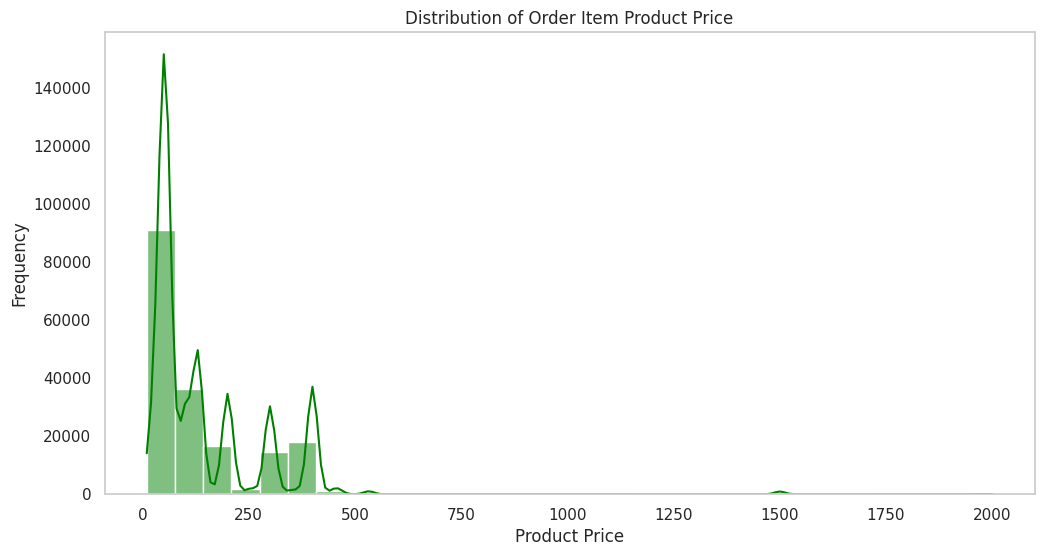

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



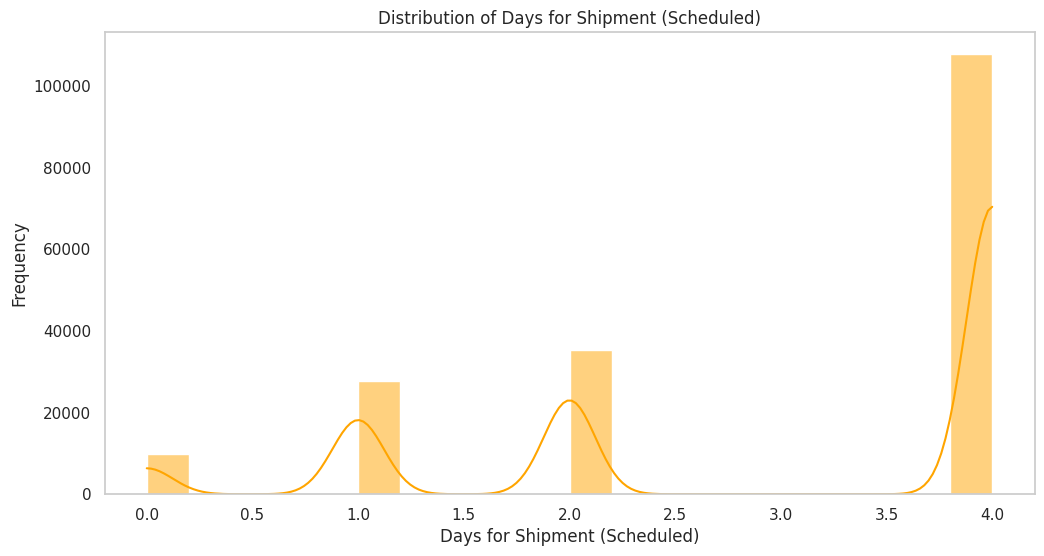

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



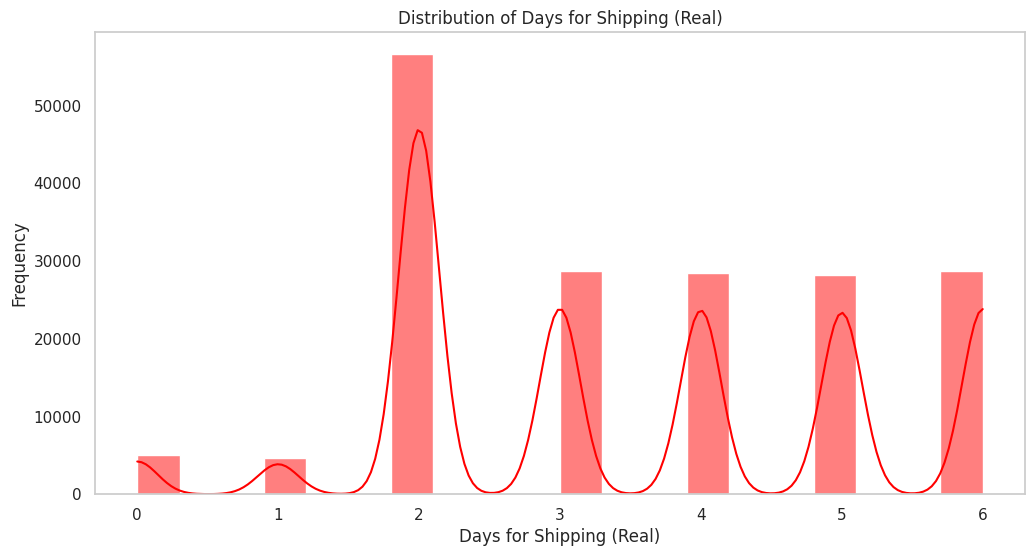

In [215]:
# Set a consistent style
sns.set(style="whitegrid")

# Distribution of Sales per customer
plt.figure(figsize=(12, 6))
sns.histplot(df1['Sales per customer'], kde=True, color='blue', bins=30)
plt.title("Distribution of Sales per Customer")
plt.xlabel("Sales per Customer")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Distribution of Order Item Product Price
plt.figure(figsize=(12, 6))
sns.histplot(df1['Order Item Product Price'], kde=True, color='green', bins=30)
plt.title("Distribution of Order Item Product Price")
plt.xlabel("Product Price")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Distribution of Days for shipment (scheduled)
plt.figure(figsize=(12, 6))
sns.histplot(df1['Days for shipment (scheduled)'], kde=True, color='orange', bins=20)
plt.title("Distribution of Days for Shipment (Scheduled)")
plt.xlabel("Days for Shipment (Scheduled)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Distribution of Days for shipping (real)
plt.figure(figsize=(12, 6))
sns.histplot(df1['Days for shipping (real)'], kde=True, color='red', bins=20)
plt.title("Distribution of Days for Shipping (Real)")
plt.xlabel("Days for Shipping (Real)")
plt.ylabel("Frequency")
plt.grid()
plt.show()


+ Sales per customer and order item prices are skewed towards lower values, business model may focuse on high volume sales of lower-priced items.
+ The discrepancy between the schedule and actual shipping times might suggest inefficiencies or unexpected delays in shipping process.

### Product Category and Customer Segment (Top 10 Category Name, Distribution of Customer Segment)

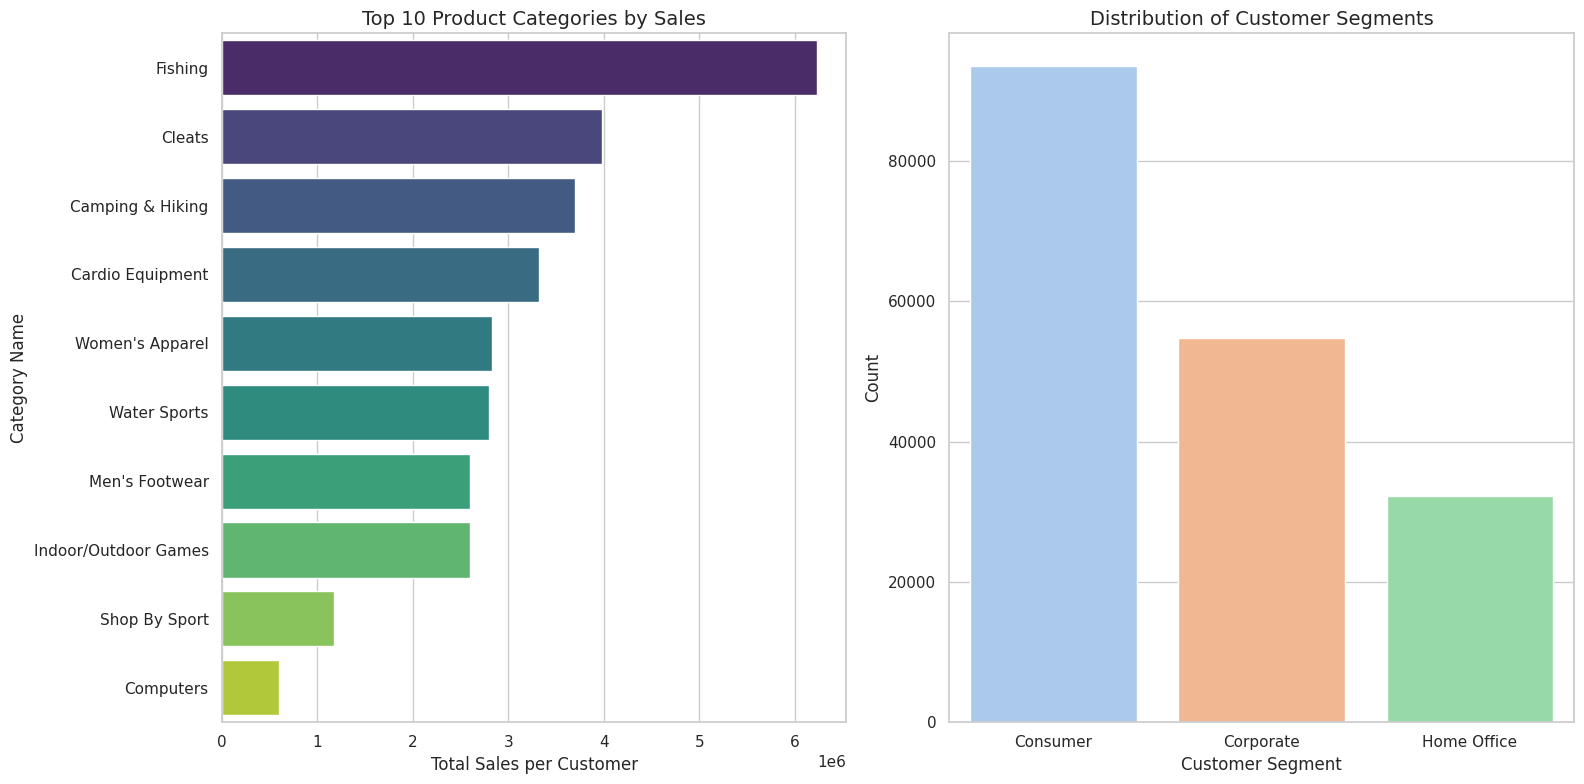

In [216]:
# Top 10 Product Categories
top_categories = (
    df.groupby('Category Name')['Sales per customer']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Distribution of Customer Segments
customer_segment_distribution = df['Customer Segment'].value_counts()

# Set up the figure
plt.figure(figsize=(16, 8))

# Plot 1: Top 10 Product Categories
plt.subplot(1, 2, 1)
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    palette='viridis'
)
plt.title('Top 10 Product Categories by Sales', fontsize=14)
plt.xlabel('Total Sales per Customer', fontsize=12)
plt.ylabel('Category Name', fontsize=12)

# Plot 2: Distribution of Customer Segments
plt.subplot(1, 2, 2)
sns.barplot(
    x=customer_segment_distribution.index,
    y=customer_segment_distribution.values,
    palette='pastel'
)
plt.title('Distribution of Customer Segments', fontsize=14)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


+ Popular categories: sports apparel and equipment, less popular: electronics
+ The 'Consumer' segment is predominant which may influence marketing strategies, product offerings ,and sales efforts.

### Fraud Order vs Non-Fraud Order (we dont do fraud detection so may not go deep on this or not at all)

### Test EDA

As the data which is being used for analysis is related to Supply chain, it makes sense to find which region has most sales? It can be found by using groupby method which will segregate similar market regions together and add all sales for that particular region using 'sum' function.

<Axes: title={'center': 'Total sales for all regions'}, xlabel='Order Region'>

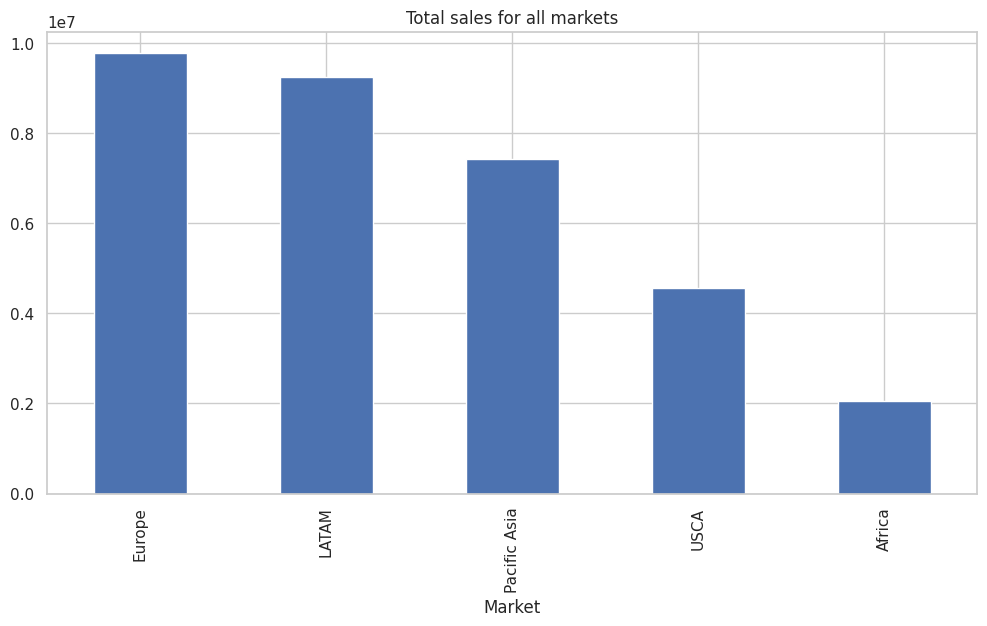

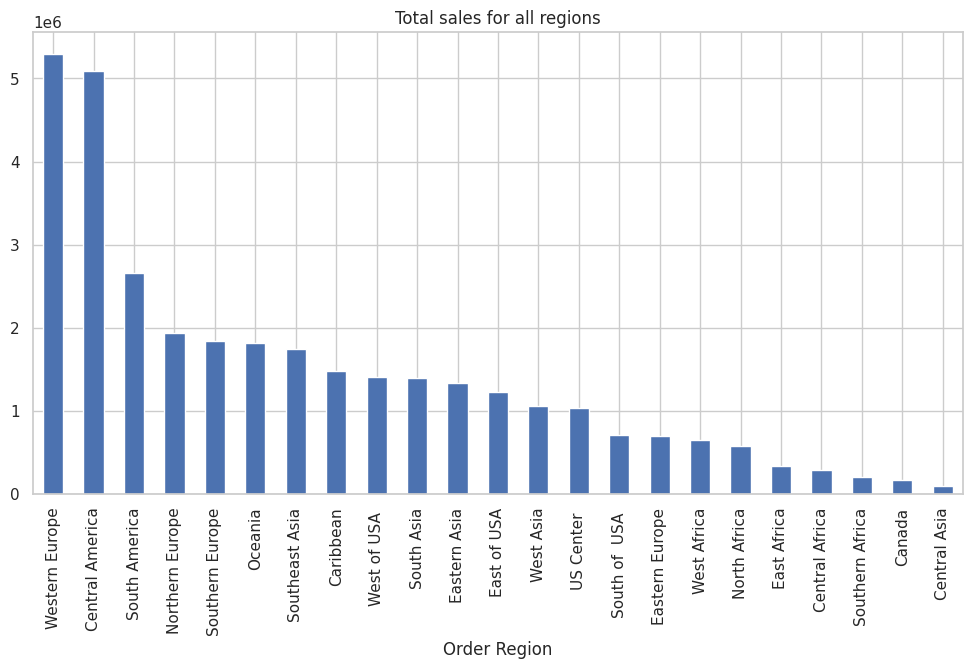

In [217]:
market = df1.groupby('Market') #Grouping by market
region = df1.groupby('Order Region')
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

In [218]:
# Same as above but use px
# market = df1.groupby('Market')
# region = df1.groupby('Order Region')

# fig1 = px.bar(
#     market['Sales per customer'].sum().sort_values(ascending=False).reset_index(),
#     x='Market',
#     y='Sales per customer',
#     title="Total sales for all markets",
#     labels={'Sales per customer': 'Total Sales'},
#     template='plotly_dark',
#     width=800,
#     height=600
# )
# fig1.show(renderer='iframe') 

In [219]:
# Same as above but use px
# region_sales_per_customer = region['Sales per customer'].sum().sort_values(ascending=False).reset_index()

# fig2 = px.bar(
#     region_sales_per_customer,
#     x='Order Region',
#     y='Sales per customer',
#     title="Total sales for all regions",
#     labels={'Sales per customer': 'Total Sales'},
#     template='plotly_dark',
#     width=800,
#     height=600
# )
# fig2.show(renderer='iframe') 


It could be seen from the graph that European market has the most number of sales whereas Africa has the least.In these markets western europe regions and central america recorded highest sales.

Which catergory of products has highest sales?The same method can be followed here to see the product category with highest sales

<Axes: title={'center': 'Average price'}, xlabel='Category Name'>

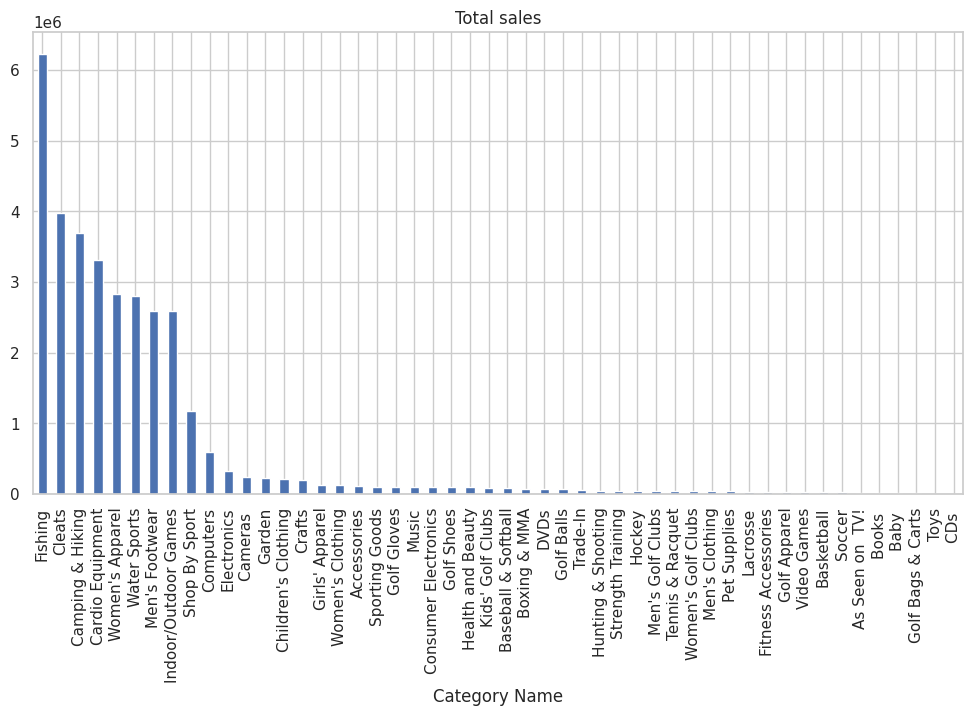

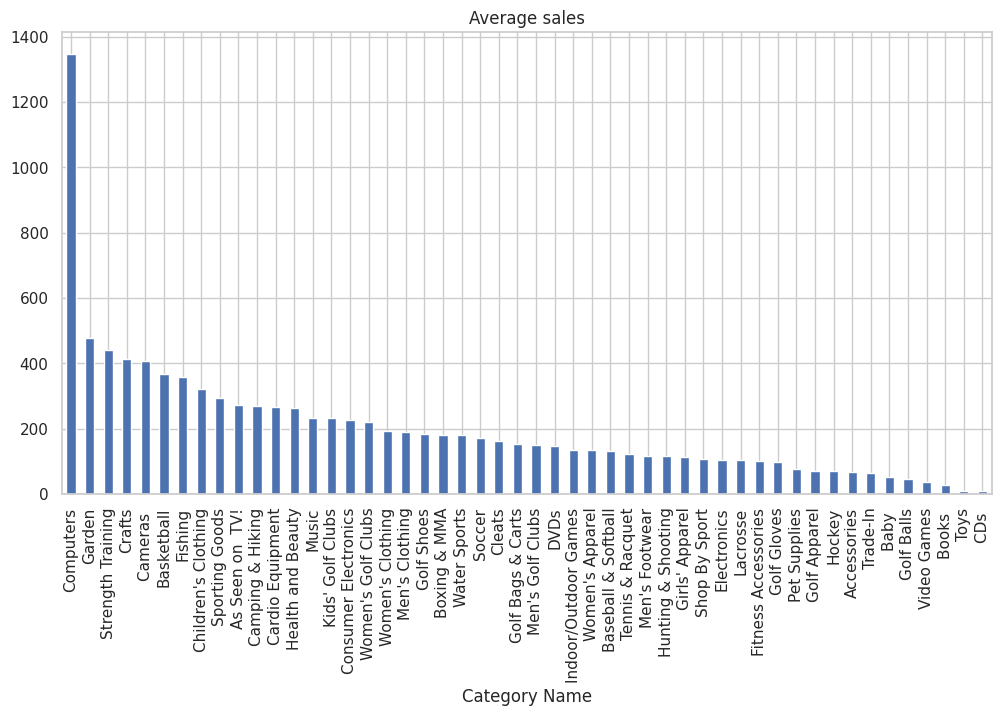

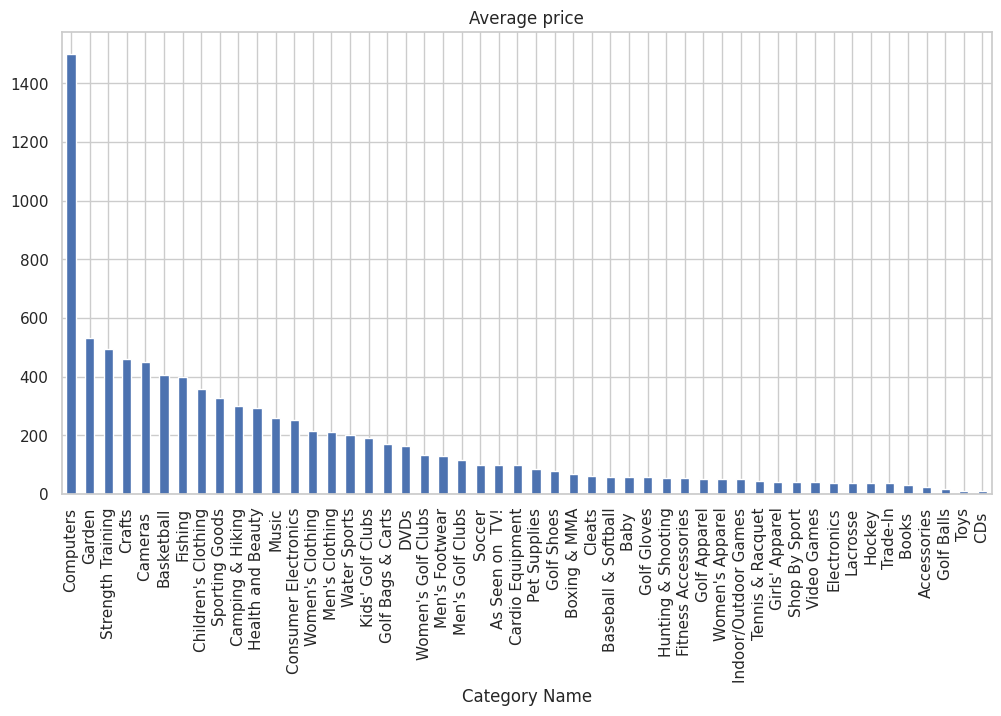

In [220]:
#Grouping all categories
cat = df1.groupby('Category Name')
plt.figure(1)
# Total sum of sales for all categories
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

As we can see from fig 1 that the fishing category had most number of sales followed by the Cleats.However it is suprising to see that top 7 products with highest price on average are the most sold products on average with computers having almost 1350 sales despite price being 1500$. Since correlation was high between Price and Sales it will be intresting to see how price is impacting the sales for all the products to see the trend.

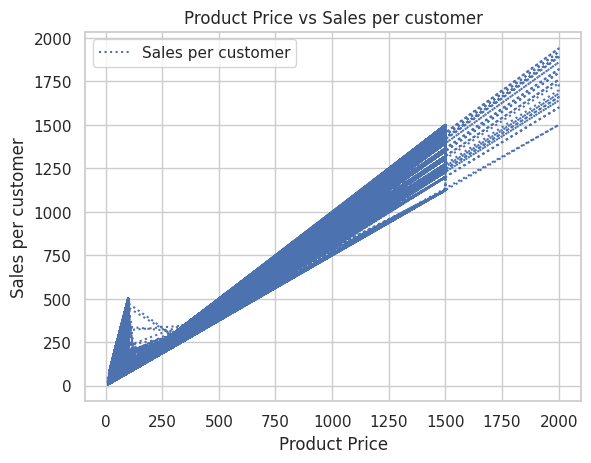

In [221]:
df1.plot(x='Product Price', y='Sales per customer',linestyle='dotted',
     markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales per customer')#title
plt.xlabel('Product Price')  # X-axis title
plt.ylabel('Sales per customer') # Y=axis title
plt.show()

It can be observed that prices has linear relation with sales. Which quarter recorded highest sales? It can be found by dividing order time into years,months,week day,hour to better observe the trend.

In [222]:
df1_01 = df1.copy()

/tmp/ipykernel_30/2087289245.py:8: FutureWarning:

Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.



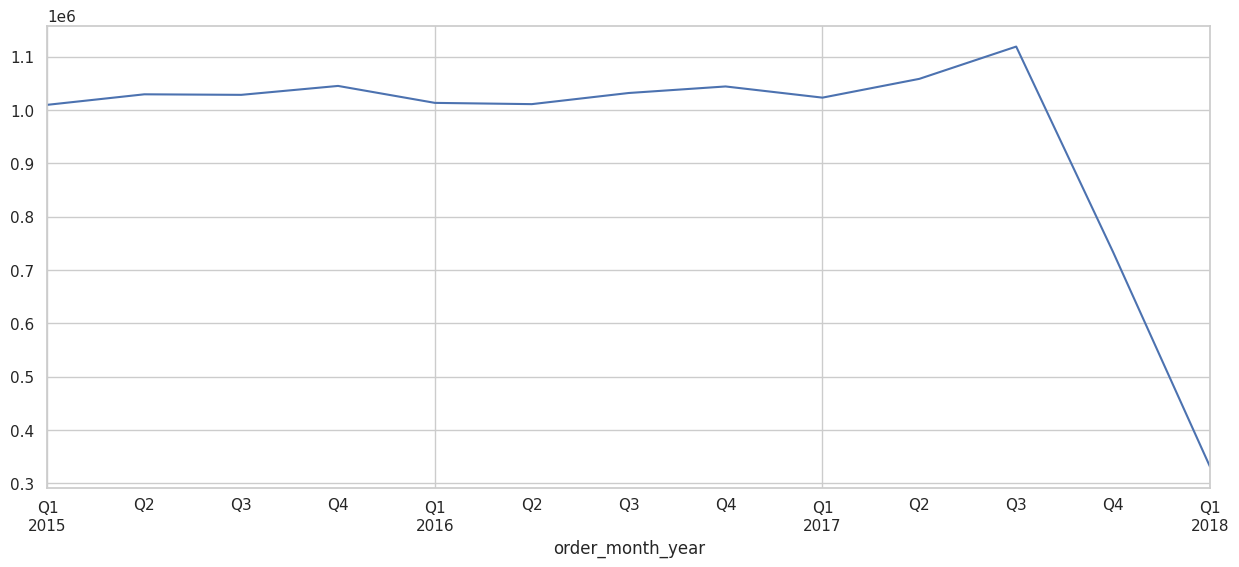

In [223]:
df1_01['order_year']= pd.DatetimeIndex(df1['order date (DateOrders)']).year
df1_01['order_month'] = pd.DatetimeIndex(df1['order date (DateOrders)']).month
df1_01['order_week_day'] = pd.DatetimeIndex(df1['order date (DateOrders)']).weekday
df1_01['order_hour'] = pd.DatetimeIndex(df1['order date (DateOrders)']).hour
df1_01['order_month_year'] = pd.to_datetime(df1['order date (DateOrders)']).dt.to_period('M')

quater= df1_01.groupby('order_month_year')
quartersales=quater['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))

By seeing above graph it can be seen that sales are consistent from Q1 2015 until Q3 of 2017 and suddenly dipped by Q1 2018. What is the purchase trend in week days,hours and months?

In [224]:
#Aggregate Sales by Category
# import plotly.express as px
# grouped_data = df1.groupby('Category Name')['Sales'].sum().reset_index()

# fig = px.bar(grouped_data, x='Category Name', y='Sales', 
#              title='Aggregate Sales by Category')

# fig.show(renderer='iframe') 
# or fig.show(renderer='iframe_connected')

Why is Fishing category has the highest aggregate sales

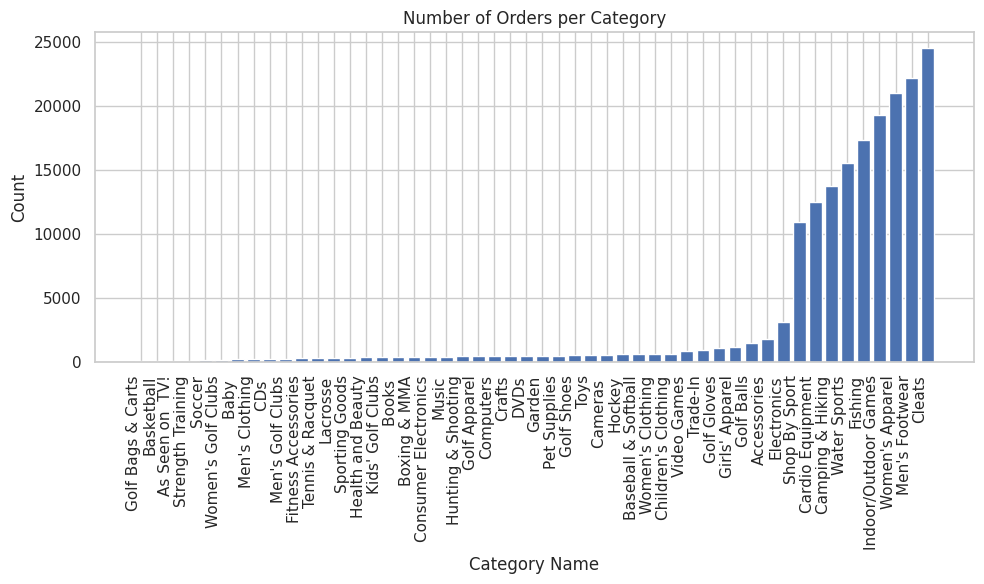

In [225]:
# Group and aggregate data with a more descriptive name for the count
category_counts = (
    df1.groupby("Category Name")["Order Id"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=True)  # Sort by count (ascending)
)

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(category_counts["Category Name"], category_counts["Count"])
plt.xlabel("Category Name")
plt.ylabel("Count")
plt.title("Number of Orders per Category")
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [226]:
# Above but px
# Group and aggregate data with a more descriptive name for the count
category_counts = df1.groupby(['Category Name'])['Order Id'].count().reset_index(name='Count')

# Sort by count (ascending)
category_counts = category_counts.sort_values(by='Count', ascending=True)

# Create bar chart (using the corrected variable name)
fig = px.bar(category_counts, x='Category Name', y='Count', color='Count', title='Number of Orders per Category')

# Display the chart
fig.show(renderer='iframe') 

In [227]:
geographical = df1.groupby(['Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by='Profit of Orders', ascending=False)
print(geographical.head())

geographical_with_coords = geographical.merge(
    df1[['Order Country', 'Order City', 'Latitude', 'Longitude']].drop_duplicates(),
    on=['Order Country', 'Order City'],
    how='left'  # Use a left join to keep all rows from the geographical DataFrame
)

print(geographical_with_coords.head())
geographical_with_coords_unique = geographical_with_coords.drop_duplicates(
    subset=['Order Country', 'Order City'],
    keep='first'  # Keep the first occurrence of each unique pair
)

print(geographical_with_coords_unique.head())

fig = px.choropleth(
    geographical, 
    locationmode='country names',
    locations='Order Country',
    color='Profit of Orders',
    hover_name='Order Country',
    color_continuous_scale=px.colors.sequential.YlOrRd
)

highlight_points = geographical_with_coords_unique.loc[
    ((geographical_with_coords_unique['Order Country'].str.lower() == 'repblica dominicana'.lower()) &
    (geographical_with_coords_unique['Order City'].str.lower() == 'santo domingo'.lower())) | 
    ((geographical_with_coords_unique['Order Country'].str.lower() == 'estados unidos'.lower()) &
    (geographical_with_coords_unique['Order City'].str.lower() == 'new york city'.lower()))
]

print(highlight_points)

highlight_scatter = px.scatter_geo(
    highlight_points,
    lat='Latitude',
    lon='Longitude',
    text='Profit of Orders',
    size='Profit of Orders',
    size_max=10,
    color_discrete_sequence=['red']
)


# Add the scatter plot to the choropleth map
fig.add_trace(highlight_scatter.data[0])

# Show the combined plot
fig.show(renderer='iframe') 


            Order Country     Order City  Profit of Orders
3260  Repblica Dominicana  Santo Domingo      51111.670019
1492       Estados Unidos  New York City      47889.759868
2152             Honduras    Tegucigalpa      40973.640056
1431       Estados Unidos    Los Angeles      38014.360024
2841            Nicaragua        Managua      34319.950107
         Order Country     Order City  Profit of Orders   Latitude  Longitude
0  Repblica Dominicana  Santo Domingo      51111.670019  18.291080 -66.370506
1  Repblica Dominicana  Santo Domingo      51111.670019  18.256718 -66.370628
2  Repblica Dominicana  Santo Domingo      51111.670019  18.247389 -66.370575
3  Repblica Dominicana  Santo Domingo      51111.670019  40.640594 -73.975189
4  Repblica Dominicana  Santo Domingo      51111.670019  18.265968 -66.370636
            Order Country     Order City  Profit of Orders   Latitude  \
0     Repblica Dominicana  Santo Domingo      51111.670019  18.291080   
694        Estados Unidos  New Y

## Below this is for Fraud consider delet

In [228]:
import plotly.express as px
loss = df1[df1['Benefit per order'] < 0]
loss_by_category = loss['Category Name'].value_counts().nlargest(10).reset_index()
loss_by_category.columns = ['Category Name', 'Count']
fig1 = px.bar(
    loss_by_category,
    x='Category Name',
    y='Count',
    title='Products with Most Loss',
    labels={'Category Name': 'Product Category', 'Count': 'Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig1.show(renderer='iframe') 

In [229]:
loss_by_region = loss['Order Region'].value_counts().nlargest(10).reset_index()
loss_by_region.columns = ['Order Region', 'Count']
fig2 = px.bar(
    loss_by_region,
    x='Order Region',
    y='Count',
    title='Regions with Most Loss',
    labels={'Order Region': 'Region', 'Count': 'Count'},
    template='plotly_dark',
    width=800,
    height=600
)

fig2.show(renderer='iframe') 

total_loss = loss['Benefit per order'].sum()
print("Total loss: ", total_loss)

Total loss:  -3883483.205769753


**Loss may due to late deliveries and fraud, lol**

In [230]:
late_delivery_data = df1[df1['Delivery Status'] == 'Late delivery']
late_by_region = late_delivery_data['Order Region'].value_counts().nlargest(10).reset_index()
late_by_region.columns = ['Order Region', 'Late Deliveries']
fig = px.bar(
    late_by_region,
    x='Order Region',
    y='Late Deliveries',
    title='Top 10 Regions with Most Late Deliveries',
    labels={'Order Region': 'Region', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',
    width=800,
    height=600
)

# Show the plot
fig.show(renderer='iframe') 

**Check which shipment type is used where there are late deliveries**

In [231]:
late_by_region_shipment = late_delivery_data.groupby(['Order Region', 'Shipping Mode']).size().reset_index(name='Late Deliveries')
late_by_region_shipment = late_by_region_shipment.sort_values(by='Late Deliveries', ascending=False)
# Plotting the late deliveries by region and shipment type using Plotly Express bar plot
fig = px.bar(
    late_by_region_shipment,
    x='Order Region',
    y='Late Deliveries',
    color='Shipping Mode',
    barmode='group',
    title='Late Deliveries by Region and Shipment Type',
    labels={'Order Region': 'Region', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',

)

# Show the plot
fig.show(renderer='iframe')

**Finding which payment method is used to conduct frauds can be useful to prevent fraud from happening in future**

In [232]:
data=df1[(df1['Type'] != 'TRANSFER')&(df1['Order Status'] == 'SUSPECTED_FRAUD')]
data['Order Region'].value_counts()

Series([], Name: count, dtype: int64)

In [233]:
fraud_data = df1[(df1['Order Status'] == 'SUSPECTED_FRAUD') & (df1['Type'] == 'TRANSFER')]

fraud_by_region = fraud_data['Order Region'].value_counts().reset_index()

fraud_by_region.columns = ['Order Region', 'Count']

fraud_by_region = fraud_by_region.sort_values(by='Count', ascending=False)

fig = px.bar(
    fraud_by_region,
    x='Order Region',
    y='Count',
    title='Regions with Highest Fraud',
    labels={'Order Region': 'Region', 'Count': 'Fraud Count'},
    template='plotly_dark',
    width=800,
    height=600
)

fig.show(renderer='iframe')

**Check customers causing this fraud**

In [234]:
suspected_fraud_data = df1[df1['Order Status'] == 'SUSPECTED_FRAUD']
fraud_by_customer = suspected_fraud_data['Customer Full Name'].value_counts().nlargest(10).reset_index()
fraud_by_customer.columns = ['Customer Full Name', 'Fraud Count']
fig = px.bar(
    fraud_by_customer,
    x='Customer Full Name',
    y='Fraud Count',
    title='Top 10 Customers Causing Fraud',
    labels={'Customer Full Name': 'Customer', 'Fraud Count': 'Fraud Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show(renderer='iframe')

## Finding important parameters (correlation, etc) TBD

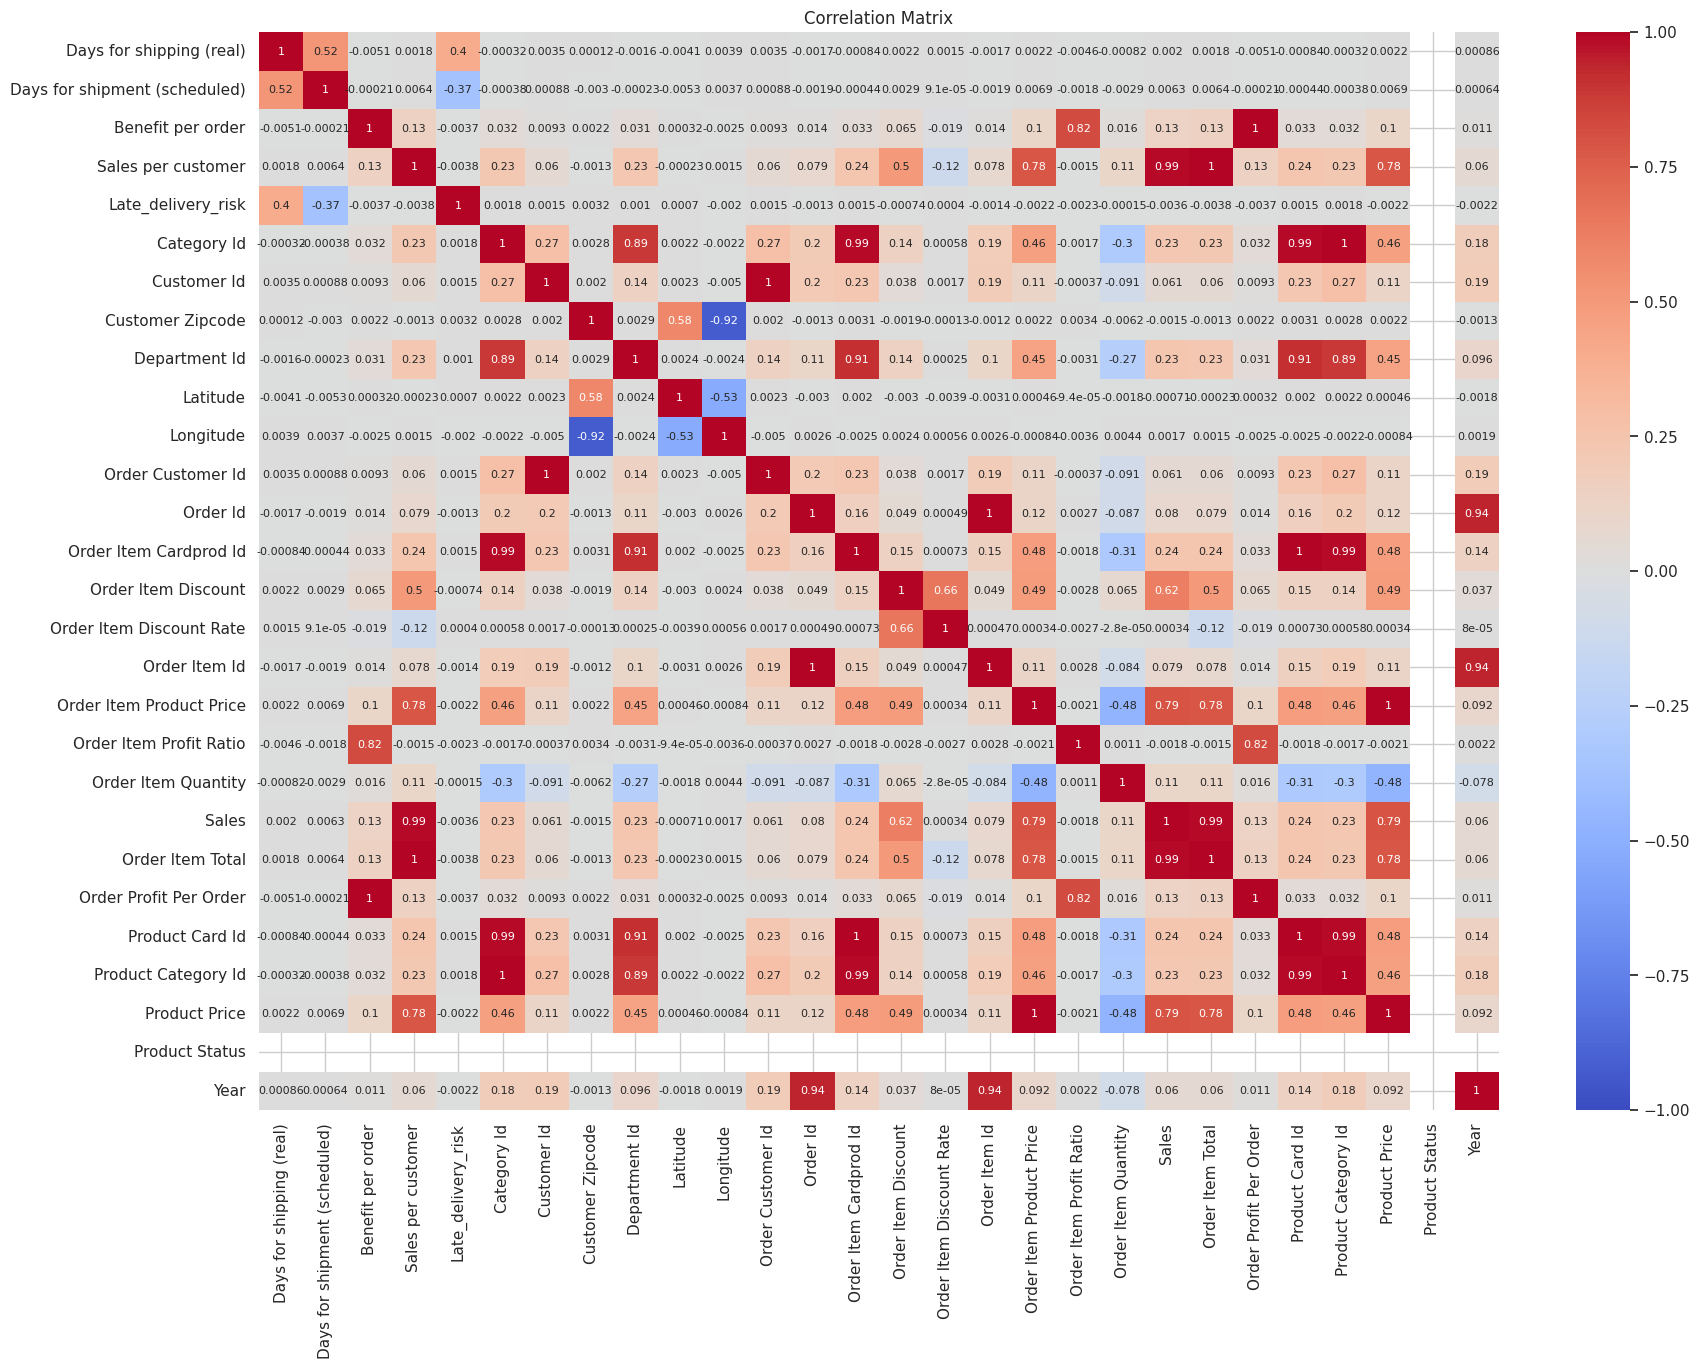

In [235]:
df_numeric = df1.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

In [236]:
print("Tuple where benefits per order and order profit per order are not equal :"+str(df1[df1["Benefit per order"]!=df1["Order Profit Per Order"]].shape[0]))
print("Tuple where sales per customer and Order Item Total are not equal :"+str(df1[df1["Sales per customer"]!=df1["Order Item Total"]].shape[0]))
print("Tuple where Order Item Cardprod Id and Product Card Id are not equal :"+str(df1[df1["Order Item Cardprod Id"]!=df1["Product Card Id"]].shape[0]))
print("Tuple where Product Price and Order Item Product Price are not equal :"+str(df1[df1["Product Price"]!=df1["Order Item Product Price"]].shape[0]))
print("Tuple where Category Id and Product Category Id are not equal :"+str(df1[df1["Product Category Id"]!=df1["Category Id"]].shape[0]))
print("Tuple where Order Customer Id and Customer Id Product Price are not equal :"+str(df1[df1["Order Customer Id"]!=df1["Customer Id"]].shape[0]))
print("Tuple where Order Item Id and Order Id are not equal :"+str(df1[df1["Order Item Id"]!=df1["Order Id"]].shape[0]))

Tuple where benefits per order and order profit per order are not equal :0
Tuple where sales per customer and Order Item Total are not equal :0
Tuple where Order Item Cardprod Id and Product Card Id are not equal :0
Tuple where Product Price and Order Item Product Price are not equal :0
Tuple where Category Id and Product Category Id are not equal :0
Tuple where Order Customer Id and Customer Id Product Price are not equal :0
Tuple where Order Item Id and Order Id are not equal :180506


In [237]:
df1[['Order Item Id','Order Id']]


,Order Item Id,Order Id
0,180517,77202
1,179254,75939
2,179253,75938
3,179252,75937
4,179251,75936
...,...,...
180514,65177,26043
180515,65161,26037
180516,65129,26024
180517,65126,26022


In [238]:
df1.drop(["Benefit per order","Sales per customer","Order Item Cardprod Id","Order Item Product Price","Product Category Id","Order Customer Id"],axis=1,inplace=True)

In [239]:
unique_values = df1["Product Status"].unique()
unique_values

array([0])

In [240]:
df1.drop("Product Status",axis=1,inplace=True)


In [241]:
vif=pd.DataFrame()
vif["columns"]=['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']
vif["vif value"] = [variance_inflation_factor(df1[['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']].values, i) for i in range(len(vif["columns"]))]
vif.T

,0,1,2,3,4,5,6,7
columns,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
vif value,389471994.7526,6.126176,3.410578,12.809174,25475586332.074692,20692838085.60675,3.412907,24.869565


In [242]:
df1[['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']].head(5)

,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
0,13.110000,0.04,0.29,1,327.75,314.640015,91.250000,327.75
1,16.389999,0.05,-0.80,1,327.75,311.359985,-249.089996,327.75
2,18.030001,0.06,-0.80,1,327.75,309.720001,-247.779999,327.75
3,22.940001,0.07,0.08,1,327.75,304.809998,22.860001,327.75
4,29.500000,0.09,0.45,1,327.75,298.250000,134.210007,327.75


In [243]:
df1.drop(["Order Item Total","Product Price","Order Item Discount Rate"],axis=1,inplace=True)

In [244]:
vif=pd.DataFrame()
vif["columns"]=['Sales',
                'Order Item Quantity','Order Item Discount','Order Item Profit Ratio']
vif["data"] = [variance_inflation_factor(df1[['Sales',
                'Order Item Quantity','Order Item Discount','Order Item Profit Ratio']].values, i) for i in range(len(vif["columns"]))]
vif

,columns,data
0,Sales,4.200130
1,Order Item Quantity,2.124561
2,Order Item Discount,3.068063
3,Order Item Profit Ratio,1.052856


# 1. Reorder point (Inventory Optimization) 

The economic order quantity (EOQ) refers to the ideal order quantity a company should purchase in order to minimize its inventory costs, such as holding costs, shortage costs, and order costs.

**Reorder Point Analysis:** (Daily average sales * average lead time) + safety stock

The reorder point and Economic Order Quantity (EOQ) are interrelated in inventory management in the following ways:

* Reorder point: Determines when to place an order based on demand and delivery time.* 
EOQ: Calculates the optimal reorder quantity to minimise total inventory costs, taking into account ordering costs and inventory holding costs.


In [245]:
# Select relevant columns and make a copy of the data
data = df1[['Product Name', 'Sales', 'Days for shipping (real)', 'order date (DateOrders)']].copy()

# Handle missing values if any
data.dropna(subset=['Product Name', 'Sales', 'Days for shipping (real)', 'order date (DateOrders)'], inplace=True)

# Group the data by 'Product Name' and calculate necessary metrics
grouped_data = data.groupby('Product Name').agg({
    'Sales': 'sum',  # Total sales for each product
    'Days for shipping (real)': 'mean',  # Average lead time for each product
    'order date (DateOrders)': 'count'  # Number of orders for each product (to estimate demand rate)
})

# Calculate the demand rate (average sales per day)
grouped_data['DemandRate'] = grouped_data['Sales'] / grouped_data['order date (DateOrders)']
grouped_data['LeadTime'] = grouped_data['Days for shipping (real)']

# Convert 'order date (DateOrders)' to datetime format for further operations
data['Date'] = pd.to_datetime(data['order date (DateOrders)'])

# Calculate daily sales for each product
data['DailySales'] = data.groupby(['Product Name', data['Date'].dt.date])['Sales'].transform('sum')

# Calculate the standard deviation of daily demand for each product
std_dev_demand = data.groupby('Product Name')['DailySales'].std()
grouped_data['StdDevDemand'] = std_dev_demand

# Desired service level factor (Z) for a given service level (e.g., 95% service level)
Z = 1.96  # For a 95% service level

# Calculate Safety Stock
grouped_data['SafetyStock'] = Z * grouped_data['StdDevDemand'] * np.sqrt(grouped_data['LeadTime'])

# Calculate Reorder Point
grouped_data['ReorderPoint'] = grouped_data['LeadTime'] * grouped_data['DemandRate'] + grouped_data['SafetyStock']

# Display relevant columns
optimized_inventory = grouped_data[['DemandRate', 'LeadTime', 'StdDevDemand', 'SafetyStock', 'ReorderPoint']]

optimized_inventory

,DemandRate,LeadTime,StdDevDemand,SafetyStock,ReorderPoint
Product Name,,,,,
Adult dog supplies,84.400002,3.388211,1068.254717,3854.039301,4140.004347
Baby sweater,59.080002,3.149758,997.133404,3468.550020,3654.637755
Bag Boy Beverage Holder,75.686558,3.602151,67.576440,251.380920,524.015297
Bag Boy M330 Push Cart,241.129274,3.391304,152.526816,550.535919,1368.278675
Bowflex SelectTech 1090 Dumbbells,599.989990,3.500000,309.833499,1136.104983,3236.069949
...,...,...,...,...,...
adidas Kids' F5 Messi FG Soccer Cleat,104.302254,3.461832,76.446820,278.784418,639.861304
adidas Men's F10 Messi TRX FG Soccer Cleat,184.690530,3.511475,157.811959,579.616577,1228.152832
adidas Men's Germany Black Crest Away Tee,74.307958,3.692042,69.618091,262.187190,536.535258


# 2. Days for shipping prediction (TBD)

In [246]:
# df2 = df_cleaned.copy()

In [247]:
# columns_to_drop = ['Customer City', 'Customer Country','Customer State',
#                    'Customer Street', 'Department Name', 'Order City',
#                    'Order Country', 'order date (DateOrders)','Product Name', 'shipping date (DateOrders)']
# new_df = df2.drop(columns=columns_to_drop)

In [248]:
# new_df

In [249]:
# new_df.info()

In [250]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# encoded_df = new_df.copy()  
# for column in new_df.columns:
#     if new_df[column].dtype == 'object':  
#         encoded_df[column] = label_encoder.fit_transform(new_df[column])

# encoded_df

In [251]:
# encoded_df.isna().sum()

In [252]:
# def custom_mode(column):
#     frequency = {}
#     for value in column:
#         if pd.notnull(value):  
#             frequency[value] = frequency.get(value, 0) + 1
    
#     max_freq = max(frequency.values())
#     mode_values = [key for key, value in frequency.items() if value == max_freq]    
#     return mode_values

# encoded_df['Customer Zipcode'].fillna(custom_mode(encoded_df['Customer Zipcode'])[0], inplace=True)

## Outlier Visualization via Boxplots

In [253]:
# columns = [
#     'Type',
#     'Days for shipping (real)',
#     'Days for shipment (scheduled)',
#     'Market',
#     'Order Item Discount',
#     'Order Item Profit Ratio',
#     'Order Item Quantity',
#     'Sales',
#     'Order Profit Per Order',
#     'Order Status',
# ]

In [254]:
# def mean(data):
#     return sum(data) / len(data)

# def median(data):
#     data = sorted(data)
#     n = len(data)
#     return (data[n//2 - 1] + data[n//2]) / 2 if n % 2 == 0 else data[n//2]

# def mode(data):
#     freq = {}
#     for x in data:
#         freq[x] = freq.get(x, 0) + 1
#     max_freq = max(freq.values())
#     return [k for k, v in freq.items() if v == max_freq]

# def data_range(data):
#     return max(data) - min(data)

# def five_number_summary(data):
#     data = sorted(data)
#     n = len(data)
#     Q1 = median(data[:n//2])
#     Q2 = median(data)
#     Q3 = median(data[-(n//2):])
#     return min(data), Q1, Q2, Q3, max(data)

# def symmetry_and_skewness(data):
#     meanf = mean(data)
#     medianf = median(data)
#     modef = mode(data)[0] if mode(data) else None
#     if meanf == medianf == modef:
#         return "The distribution is symmetric and not skewed."
#     elif meanf > medianf:
#         return "The distribution is right and positively skewed."
#     elif meanf < medianf:
#         return "The distribution is left and negatively skewed."

# for column in columns:
#     column = column.strip()  
#     data = encoded_df[column].dropna().tolist()  

#     mean_val = mean(data)
#     median_val = median(data)
#     mode_val = mode(data)[0] if mode(data)[0] > 1 else data[0]
#     range_val = data_range(data)
#     five_num_summary = five_number_summary(data)
#     data_skewness = symmetry_and_skewness(data)

#     print(f"\nStatistics for column: {column}")
#     print("Mean:", mean_val)
#     print("Median:", median_val)
#     print("Mode:", mode_val)
#     print("Range:", range_val)
#     print("Five Number Summary:", five_num_summary)
#     print("Skewness:", data_skewness)

In [255]:
# def iqr_outliers(data):
#     data = sorted(data)
#     n = len(data)
#     Q1 = median(data[:n//2])
#     Q3 = median(data[-(n//2):]) if n % 2 == 0 else median(data[n//2+1:])
    
#     IQR = Q3 - Q1
    
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     outliers = [x for x in data if x < lower_bound or x > upper_bound]
#     return outliers, lower_bound, upper_bound

In [256]:
# import matplotlib.pyplot as plt

# num_rows = 5
# num_cols = 2

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# axes = axes.flatten()

# for i, column in enumerate(columns):
#     ax = axes[i]
#     ax.boxplot(encoded_df[column].dropna())
#     ax.set_title(column)
#     ax.set_ylabel('Value')

# plt.tight_layout()
# plt.show()

## Normalizing data using Decimal Scaling

In [257]:
# y = encoded_df['Days for shipping (real)']
# X = encoded_df.drop('Days for shipping (real)',axis=1)

In [258]:
# def decimal_scaling(df):
#     for col in df.columns:
#         if pd.api.types.is_numeric_dtype(df[col]):
#             max_val = df[col].abs().max()
#             factor = 10 ** len(str(int(max_val)))
#             df[col] = df[col] / factor
#     return df

# X = decimal_scaling(X)
# X

In [259]:
# y

In [260]:
# y.unique()

In [261]:
# y.value_counts()

## Predict Days for shipping with Decision Tree

In [262]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# model = DecisionTreeClassifier(criterion='gini',
#                                        max_depth=18, 
#                                        max_features=None,
#                                        min_samples_leaf=1,
#                                        min_samples_split=12,
#                                        splitter='random', 
#                                        random_state=42)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

In [263]:
# from sklearn.metrics import classification_report

# acc = accuracy_score(y_test,y_pred)
# report = classification_report(y_test,y_pred,output_dict=True)
# print(classification_report(y_test,y_pred))

In [264]:
# from IPython import display

# display.display(pd.DataFrame(report))
# df2 = pd.DataFrame(report)
# df2.iloc[:3,:7].T.plot(kind='bar')
# plt.show()

## Lime XAI for Dimensionality Reduction

In [265]:
# import lime
# from lime.lime_tabular import LimeTabularExplainer

# explainer = LimeTabularExplainer(training_data=X_train.values, feature_names=X_train.columns, class_names=['0','1','2','3','4','5','6'], mode='classification')

# explanation = explainer.explain_instance(X_train.iloc[0], model.predict_proba)

# feature_importance = explanation.as_list()

In [266]:
# feature_importance


In [267]:
# features, scores = zip(*feature_importance)

# plt.figure(figsize=(10, 6))
# plt.barh(features, scores)
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.title('Feature Importance (Decision Tree)')
# plt.show()

## Epoch : 2 

In [268]:
# model1 = DecisionTreeClassifier()

In [269]:
# X_train_new = X_train.drop(['Latitude','Delivery Status','Shipping Mode','Customer Id','Longitude','Market','Benefit per order'],axis=1)
# X_test_new = X_test.drop(['Latitude','Delivery Status','Shipping Mode','Customer Id','Longitude','Market','Benefit per order'],axis=1)

In [270]:
# X_train_new

In [271]:
# model1.fit(X_train_new,y_train)
# y_pred1 = model1.predict(X_test_new)

In [272]:
# from sklearn.metrics import classification_report

# acc = accuracy_score(y_test,y_pred1)
# report = classification_report(y_test,y_pred1,output_dict=True)
# print(classification_report(y_test,y_pred1))

In [273]:
# import lime
# from lime.lime_tabular import LimeTabularExplainer

# explainer = LimeTabularExplainer(training_data=X_train_new.values, feature_names=X_train_new.columns, class_names=['1','2','3','4','5','6'], mode='classification')

# explanation = explainer.explain_instance(X_train_new.iloc[0], model1.predict_proba)

# feature_importance = explanation.as_list()

In [274]:
# features, scores = zip(*feature_importance)

# plt.figure(figsize=(10, 6))
# plt.barh(features, scores)
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.title('Feature Importance (Decision Tree)')
# plt.show()

## Epoch : 3

In [275]:
# X_train_new = X_train_new.drop(['Product Price','Order Profit Per Order'],axis=1)
# X_test_new = X_test_new.drop(['Product Price','Order Profit Per Order'],axis=1)

In [276]:
# model1.fit(X_train_new,y_train)
# y_pred1 = model1.predict(X_test_new)

In [277]:
# from sklearn.metrics import classification_report

# acc = accuracy_score(y_test,y_pred1)
# report = classification_report(y_test,y_pred1,output_dict=True)
# print(classification_report(y_test,y_pred1))

In [278]:
# import lime
# from lime.lime_tabular import LimeTabularExplainer

# explainer = LimeTabularExplainer(training_data=X_train_new.values, feature_names=X_train_new.columns, class_names=['1','2','3','4','5','6'], mode='classification')

# explanation = explainer.explain_instance(X_train_new.iloc[0], model1.predict_proba)

# feature_importance = explanation.as_list()

In [279]:
# features, scores = zip(*feature_importance)

# plt.figure(figsize=(10, 6))
# plt.barh(features, scores)
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.title('Feature Importance (Decision Tree)')
# plt.show()

In [280]:
# X_train_new = X_train_new.drop(['Order Id','Order Customer Id','Category Name','Order Status','Category Id','Order Item Quantity'],axis=1)
# X_test_new = X_test_new.drop(['Order Id','Order Customer Id','Category Name','Order Status','Category Id','Order Item Quantity'],axis=1)

In [281]:
# model1.fit(X_train_new,y_train)
# y_pred1 = model1.predict(X_test_new)

In [282]:
# from sklearn.metrics import classification_report

# acc = accuracy_score(y_test,y_pred1)
# report = classification_report(y_test,y_pred1,output_dict=True)
# print(classification_report(y_test,y_pred1))

In [283]:
# importances = model1.feature_importances_
# indices = np.argsort(importances)
# features = X.columns
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='g', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [284]:
print("Hello")

Hello


# 3. Late delivery prediction (Predictive Analytics) TBD

In [285]:
# df3 = df.copy()

In [286]:
# ldp_dataset_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
#                         'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
#                         'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
#                         'shipping_day','shipping_month','shipping_year']
# len(ldp_dataset_features)

In [287]:
# new_data = df3[ldp_dataset_features] 
# latedp_model_data = new_data
# new_data.head()

In [288]:
#One-Hot encoding categotical variables in the data
# latedp_model_data = pd.get_dummies(latedp_model_data)
# latedp_model_data.shape

+ Target features : Days for shipping (real), Days for shipment (scheduled)+ 
Problem type : Multi-output Regression

In [289]:
# x = latedp_model_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
# y = latedp_model_data[['Days for shipping (real)','Days for shipment (scheduled)']]
# x.shape,y.shape

In [290]:
# train-test_split
# x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20)

In [291]:
# from sklearn.tree import DecisionTreeRegressor

#sc=StandardScaler() 
#No standard Scaling is not required for Decision Trees are tree-based algorithms and do not need normalization or standard scaling
#pc=PCA()
# The hyper-parameters used are default hyper-parameters
# model=DecisionTreeRegressor()
# model.fit(x_train,y_train)
# pred=model.predict(x_test)

## Regression Model Eval

In [292]:
#Function for estimating r2_score, mean_squared_error, mean_absolute_error
# def metrics(y_test,pred):
#     a =r2_score(y_test,pred)
#     b =mean_squared_error(y_test,pred)
#     c =mean_absolute_error(y_test,pred)
#     print('The r-squared score of the model is ',a)
#     print('The mean squared error is',b)
#     print('The mean accuracy score is',c)

In [293]:
# metrics(y_test,pred)

In [294]:
#PREDICTIVE ANALYTICS : Late_delivery_prediction
#Converting the predicted output array to dataframe
# Prediction = pd.DataFrame(pred)
# prediction = Prediction.rename(columns={0:'Fastest_shipment',1:'Avg_shipment'})
# prediction.head()

+ Using Fastest product shipment and Normal shipment duration(in days) features from predictions+ 
Risk in delivery is a feature that highly corresponds and correlates to Fastest Shipment and Avg_shipment duration in days. If the fastest shipment duration is greater than avg_shipment, then late delivery risk is heavier as the scheduled days are outnumbered. Similarly, if avg_shipment values are greater than former, then there is a high probability for FAST/EARLY delivery of goods to customers

In [295]:
# Statiscal modelling
# prediction['risk'] = np.where(prediction['Avg_shipment'] >= prediction['Fastest_shipment'],0,1)

In [296]:
# prediction.head()

## Classification Performance Eval

In [297]:
# l = prediction['risk']
# m = x_test['Late_delivery_risk']
# l.shape,m.shape

In [298]:
# Defining a function to evaluate our statiscal model for Late_delivery_risk_prediction
# def evaluation_risk_factor(l,m):
#   print('1) The accuracy of the risk predictor model is :',accuracy_score(l,m))
#   print('2) The AUROC score is :',roc_auc_score(l,m))
#   print('3) Some of the key classification metrics are :')
#   print(classification_report(l,m))
#   ax=plt.subplot()
#   sns.heatmap(confusion_matrix(l,m),annot=True,ax=ax);
#   ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
#   ax.set_title('Confusion matrix for Risk Delivery classfication');

In [299]:
# evaluation_risk_factor(l,m)


In [300]:
# sns.set(style="darkgrid")
# ax=sns.countplot(x="risk",data=prediction).set_title('Predicted Late delivery risks')

In [301]:
# bx=sns.countplot(x='Late_delivery_risk',data=x_test).set_title('Actual Late_delivery_risk')

## Saving the trained regression model to pickle file¶

In [302]:
# import pickle
# filename = 'Shipping_duration_estimator.pkl'
# pickle.dump(model,open(filename,'wb'))

In [303]:
# finance

# 4. Inventory Optimization

In [304]:
df_inventory = df_cleaned.copy()

In [305]:
df_inventory

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.750000,0,2018-02-03 22:56:00,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastn,PENDING,1360,73,Smart watch,327.750000,0,2018-01-18 12:27:00,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastn,CLOSED,1360,73,Smart watch,327.750000,0,2018-01-17 12:06:00,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,Smart watch,327.750000,0,2018-01-16 11:45:00,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.750000,0,2018-01-15 11:24:00,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Shanghi,CLOSED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 03:40:00,Standard Class,MariaPeterson
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Osaka,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-19 01:34:00,Second Class,RonaldClark
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Australia del Sur,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 21:00:00,Standard Class,JohnSmith
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Australia del Sur,PENDING_PAYMENT,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-18 20:18:00,Standard Class,MarySmith


In [306]:
df_inventory.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Fu

In [307]:
sale_order_columns = ['Benefit per order',"Sales per customer",'Sales','Order Item Quantity','Order Item Total','Order Item Product Price','Product Category Id','Product Name','order date (DateOrders)']
df_inventory[sale_order_columns]

,Benefit per order,Sales per customer,Sales,Order Item Quantity,Order Item Total,Order Item Product Price,Product Category Id,Product Name,order date (DateOrders)
0,91.250000,314.640015,327.750000,1,314.640015,327.750000,73,Smart watch,2018-01-31 22:56:00
1,-249.089996,311.359985,327.750000,1,311.359985,327.750000,73,Smart watch,2018-01-13 12:27:00
2,-247.779999,309.720001,327.750000,1,309.720001,327.750000,73,Smart watch,2018-01-13 12:06:00
3,22.860001,304.809998,327.750000,1,304.809998,327.750000,73,Smart watch,2018-01-13 11:45:00
4,134.210007,298.250000,327.750000,1,298.250000,327.750000,73,Smart watch,2018-01-13 11:24:00
...,...,...,...,...,...,...,...,...,...
180514,40.000000,399.980011,399.980011,1,399.980011,399.980011,45,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-16 03:40:00
180515,-613.770019,395.980011,399.980011,1,395.980011,399.980011,45,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-16 01:34:00
180516,141.110001,391.980011,399.980011,1,391.980011,399.980011,45,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-15 21:00:00
180517,186.229996,387.980011,399.980011,1,387.980011,399.980011,45,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-15 20:18:00


In [308]:
import pandas as pd

# Convert order date to datetime
df_inventory['order_date'] = pd.to_datetime(df_inventory['order date (DateOrders)'])

# Aggregate data by date and product
demand_data = df_inventory.groupby(['order_date', 'Product Name']).agg({
    'Order Item Quantity': 'sum',
    'Sales': 'sum'
}).reset_index()

# Sort by date for time-series analysis
demand_data = demand_data.sort_values('order_date')


In [309]:
demand_data

,order_date,Product Name,Order Item Quantity,Sales
0,2015-01-01 00:00:00,Diamondback Women's Serene Classic Comfort Bi,1,299.980011
1,2015-01-01 00:21:00,Nike Men's CJ Elite 2 TD Football Cleat,1,129.990005
2,2015-01-01 00:21:00,Nike Men's Dri-FIT Victory Golf Polo,5,250.000000
3,2015-01-01 00:21:00,Pelican Sunstream 100 Kayak,1,199.990005
4,2015-01-01 01:03:00,Nike Men's Dri-FIT Victory Golf Polo,3,150.000000
...,...,...,...,...
159747,2018-01-31 22:14:00,Summer dresses,1,215.820007
159748,2018-01-31 22:35:00,Summer dresses,1,215.820007
159749,2018-01-31 22:56:00,Smart watch,1,327.750000
159750,2018-01-31 23:17:00,Toys,1,11.540000


In [310]:
name_list = demand_data["Product Name"].value_counts()

In [311]:
print(name_list.keys()[10])

Children's heaters


In [312]:
product_sales = demand_data[demand_data['Product Name'] == 'Children\'s heaters'][['order_date', 'Sales']]

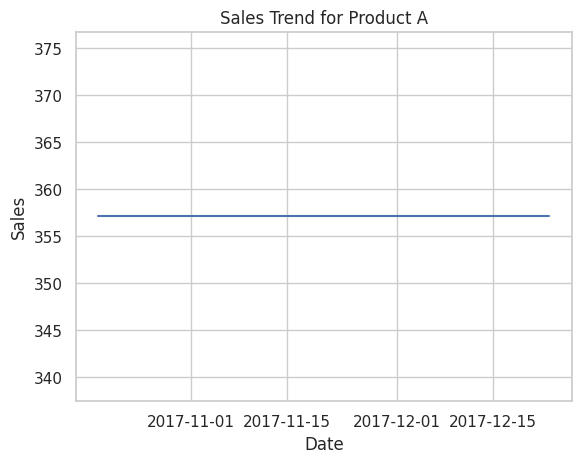

In [313]:
import matplotlib.pyplot as plt

# Plot sales over time
plt.plot(product_sales['order_date'], product_sales['Sales'])
plt.title('Sales Trend for Product A')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [314]:
product_sales

,order_date,Sales
152540,2017-10-18 13:27:00,357.100006
152541,2017-10-18 13:48:00,357.100006
152542,2017-10-18 14:09:00,357.100006
152543,2017-10-18 14:30:00,357.100006
152544,2017-10-18 14:51:00,357.100006
...,...,...
157026,2017-12-23 04:15:00,357.100006
157027,2017-12-23 04:36:00,357.100006
157028,2017-12-23 04:57:00,357.100006
157029,2017-12-23 05:18:00,357.100006


In [315]:
# LSTM to forecast product sales based on historical data
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Scale data
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(product_sales['Sales'].values.reshape(-1, 1))

# Prepare data for LSTM
sequence_length = 30  # Use the last 30 days to predict the next
X, y = [], []
for i in range(len(sales_scaled) - sequence_length):
    X.append(sales_scaled[i:i+sequence_length])
    y.append(sales_scaled[i+sequence_length])
X, y = np.array(X), np.array(y)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=20, batch_size=32)

# Predict
forecast_scaled = model.predict(X[-30:])  # Last 30 days as input
forecast = scaler.inverse_transform(forecast_scaled)  # Inverse scaling

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0000e+00
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0000e+00
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0000e+00
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00
Epoch 15/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0

In [316]:
print(forecast)

[[357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]
 [357.1]]


In [317]:
import pandas as pd

# Convert order date to datetime
df_inventory['order_date'] = pd.to_datetime(df_inventory['order date (DateOrders)'])

# Group by product and time period (e.g., weekly/monthly)
trend_data = df_inventory.groupby([pd.Grouper(key='order_date', freq='M'), 'Product Name']).agg({
    'Order Item Quantity': 'sum',  # Total quantity sold
    'Sales': 'sum',               # Total sales
    'Order Item Total': 'sum'     # Revenue per product
}).reset_index()

# Add growth metrics
trend_data['Sales Growth'] = trend_data.groupby('Product Name')['Sales'].pct_change().fillna(0.01)
trend_data['Quantity Growth'] = trend_data.groupby('Product Name')['Order Item Quantity'].pct_change().fillna(0.01)


/tmp/ipykernel_30/3600712912.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [318]:
trend_data.isnull()

,order_date,Product Name,Order Item Quantity,Sales,Order Item Total,Sales Growth,Quantity Growth
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1813,False,False,False,False,False,False,False
1814,False,False,False,False,False,False,False
1815,False,False,False,False,False,False,False
1816,False,False,False,False,False,False,False


In [319]:
# Rolling averages
trend_data['Rolling_Sales'] = (
    trend_data.groupby('Product Name')['Sales']
    .rolling(3)
    .mean()
    .reset_index(0, drop=True)
    .fillna(0.01)  # Replace NaN with 0
)

trend_data['Rolling_Quantity'] = (
    trend_data.groupby('Product Name')['Order Item Quantity']
    .rolling(3)
    .mean()
    .reset_index(0, drop=True)
    .fillna(0.01)  # Replace NaN with 0
)


# Time-based features
trend_data['Month'] = trend_data['order_date'].dt.month
trend_data['Year'] = trend_data['order_date'].dt.year


In [320]:
# Define trending threshold (e.g., 20% growth in sales/quantity)
trend_data['is_trending'] = ((trend_data['Sales Growth'] > 0.2) | (trend_data['Quantity Growth'] > 0.2)).astype(int)


In [321]:
trend_data

,order_date,Product Name,Order Item Quantity,Sales,Order Item Total,Sales Growth,Quantity Growth,Rolling_Sales,Rolling_Quantity,Month,Year,is_trending
0,2015-01-31,Bag Boy Beverage Holder,39,974.609991,876.149996,0.010000,0.010000,0.01,0.01,1,2015,0
1,2015-01-31,Bridgestone e6 Straight Distance NFL Carolina,56,1791.439987,1609.879995,0.010000,0.010000,0.01,0.01,1,2015,0
2,2015-01-31,Bridgestone e6 Straight Distance NFL San Dieg,32,1023.679994,936.020004,0.010000,0.010000,0.01,0.01,1,2015,0
3,2015-01-31,Bridgestone e6 Straight Distance NFL Tennesse,16,511.840002,435.709999,0.010000,0.010000,0.01,0.01,1,2015,0
4,2015-01-31,Clicgear 8.0 Shoe Brush,31,309.689997,273.729998,0.010000,0.010000,0.01,0.01,1,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1813,2018-01-31,Men's gala suit,31,6536.350189,5798.379990,-0.824859,-0.824859,0.01,0.01,1,2018,0
1814,2018-01-31,Rock music,144,37533.599122,33728.079954,-0.503448,-0.503448,0.01,0.01,1,2018,0
1815,2018-01-31,Smart watch,212,69483.000000,62324.980896,0.462069,0.462069,0.01,0.01,1,2018,1
1816,2018-01-31,Summer dresses,377,81364.142752,73108.190184,0.391144,0.391144,0.01,0.01,1,2018,1


In [322]:
trend_data['is_trending'].value_counts()

is_trending
0    1299
1     519
Name: count, dtype: int64

In [323]:
from sklearn.model_selection import train_test_split

# Select features and target
X = trend_data[['Rolling_Sales', 'Rolling_Quantity', 'Month', 'Year', 'Sales Growth', 'Quantity Growth']].dropna()
y = trend_data['is_trending']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [324]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       259
           1       1.00      0.98      0.99       105

    accuracy                           0.99       364
   macro avg       1.00      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [325]:
# Predict trending items
trend_data['Predicted_Trend'] = model.predict(X)

# Filter trending products
trending_products = trend_data[trend_data['Predicted_Trend'] == 1]
print(trending_products[['order_date', 'Product Name', 'Sales', 'Predicted_Trend']])


     order_date                                   Product Name         Sales  \
57   2015-02-28  Bridgestone e6 Straight Distance NFL Tennesse    799.749996   
58   2015-02-28                        Clicgear 8.0 Shoe Brush    489.509996   
66   2015-02-28           Glove It Women's Imperial Golf Glove    759.619991   
73   2015-02-28                  Nike Dri-FIT Crew Sock 6 Pack   1342.000000   
84   2015-02-28                     TYR Boys' Team Digi Jammer   2039.490043   
...         ...                                            ...           ...   
1795 2017-12-31                                   Baby sweater   7385.000229   
1808 2018-01-31                             Adult dog supplies  20762.400376   
1810 2018-01-31                           Fighting video games  24247.500000   
1815 2018-01-31                                   Smart watch   69483.000000   
1816 2018-01-31                                 Summer dresses  81364.142752   

      Predicted_Trend  
57             

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



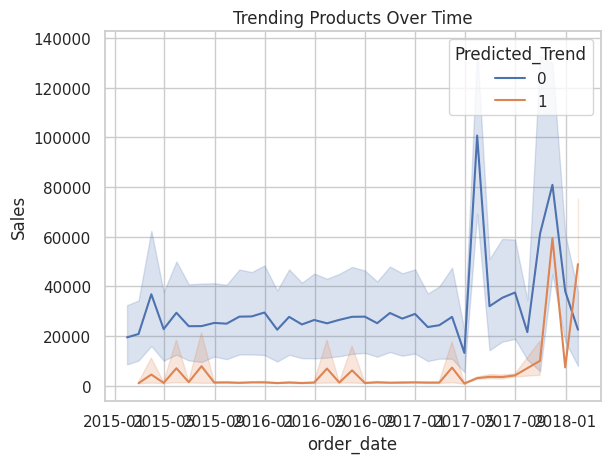

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=trend_data, x='order_date', y='Sales', hue='Predicted_Trend')
plt.title('Trending Products Over Time')
plt.show()


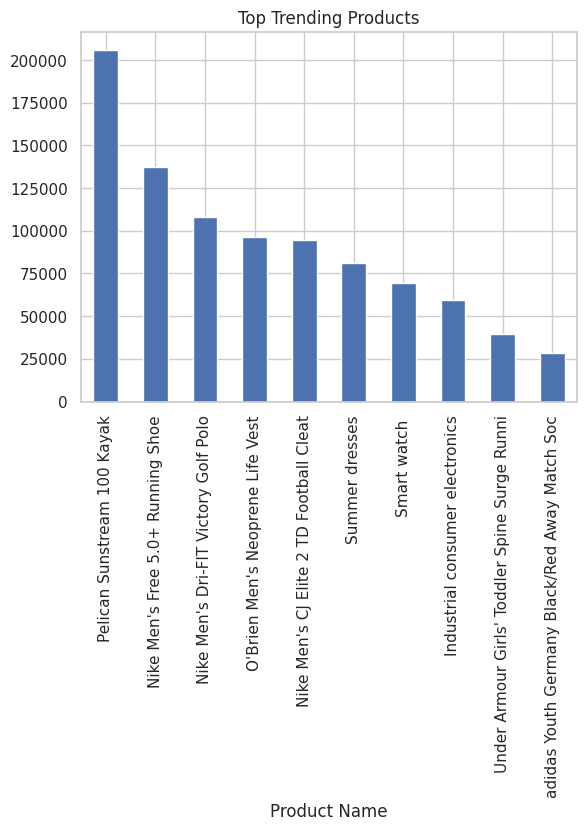

In [327]:
top_trending = trending_products.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_trending.plot(kind='bar', title='Top Trending Products')
plt.show()


In [328]:
X

,Rolling_Sales,Rolling_Quantity,Month,Year,Sales Growth,Quantity Growth
0,0.01,0.01,1,2015,0.010000,0.010000
1,0.01,0.01,1,2015,0.010000,0.010000
2,0.01,0.01,1,2015,0.010000,0.010000
3,0.01,0.01,1,2015,0.010000,0.010000
4,0.01,0.01,1,2015,0.010000,0.010000
...,...,...,...,...,...,...
1813,0.01,0.01,1,2018,-0.824859,-0.824859
1814,0.01,0.01,1,2018,-0.503448,-0.503448
1815,0.01,0.01,1,2018,0.462069,0.462069
1816,0.01,0.01,1,2018,0.391144,0.391144


In [329]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [330]:
# Apply K-means
kmeans = KMeans(n_clusters=2, random_state=42)
trend_data['Cluster'] = kmeans.fit_predict(X_scaled)

# # Analyze clusters to identify trending products
# cluster_summary = trend_data.groupby('Cluster').mean()
# print(cluster_summary)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [331]:
trend_data

,order_date,Product Name,Order Item Quantity,Sales,Order Item Total,Sales Growth,Quantity Growth,Rolling_Sales,Rolling_Quantity,Month,Year,is_trending,Predicted_Trend,Cluster
0,2015-01-31,Bag Boy Beverage Holder,39,974.609991,876.149996,0.010000,0.010000,0.01,0.01,1,2015,0,0,0
1,2015-01-31,Bridgestone e6 Straight Distance NFL Carolina,56,1791.439987,1609.879995,0.010000,0.010000,0.01,0.01,1,2015,0,0,0
2,2015-01-31,Bridgestone e6 Straight Distance NFL San Dieg,32,1023.679994,936.020004,0.010000,0.010000,0.01,0.01,1,2015,0,0,0
3,2015-01-31,Bridgestone e6 Straight Distance NFL Tennesse,16,511.840002,435.709999,0.010000,0.010000,0.01,0.01,1,2015,0,0,0
4,2015-01-31,Clicgear 8.0 Shoe Brush,31,309.689997,273.729998,0.010000,0.010000,0.01,0.01,1,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,2018-01-31,Men's gala suit,31,6536.350189,5798.379990,-0.824859,-0.824859,0.01,0.01,1,2018,0,0,0
1814,2018-01-31,Rock music,144,37533.599122,33728.079954,-0.503448,-0.503448,0.01,0.01,1,2018,0,0,0
1815,2018-01-31,Smart watch,212,69483.000000,62324.980896,0.462069,0.462069,0.01,0.01,1,2018,1,1,0
1816,2018-01-31,Summer dresses,377,81364.142752,73108.190184,0.391144,0.391144,0.01,0.01,1,2018,1,1,0


In [332]:
trend_data["Cluster"].value_counts()

Cluster
0    1531
1     287
Name: count, dtype: int64

### Predicting restocking needs

In [333]:
logs_df = pd.read_csv("/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv")

In [334]:
logs_df

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...
...,...,...,...,...,...,...,...,...
469972,Nike Men's Free TR 5.0 TB Training Shoe,as seen on tv!,10/9/2017 21:21,Oct,21,footwear,93.166.57.36,/department/footwear/category/as%20seen%20on%2...
469973,Under Armour Hustle Storm Medium Duffle Bag,fitness accessories,10/9/2017 21:21,Oct,21,footwear,126.175.2.58,/department/footwear/category/fitness%20access...
469974,Under Armour Hustle Storm Medium Duffle Bag,fitness accessories,10/9/2017 21:22,Oct,21,footwear,201.210.19.242,/department/footwear/category/fitness%20access...
469975,Nike Men's Dri-FIT Victory Golf Polo,women's apparel,10/9/2017 21:22,Oct,21,golf,56.81.167.135,/department/golf/category/women's%20apparel/pr...


In [335]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [336]:
logs_df.isna().sum()

Product       0
Category      0
Date          0
Month         0
Hour          0
Department    0
ip            0
url           0
dtype: int64

In [337]:
logs_df["Date"] = pd.to_datetime(logs_df["Date"])

In [338]:
logs_df

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,2017-09-01 06:00:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,2017-09-01 06:00:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,2017-09-01 06:00:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,2017-09-01 06:00:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,2017-09-01 06:01:00,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...
...,...,...,...,...,...,...,...,...
469972,Nike Men's Free TR 5.0 TB Training Shoe,as seen on tv!,2017-10-09 21:21:00,Oct,21,footwear,93.166.57.36,/department/footwear/category/as%20seen%20on%2...
469973,Under Armour Hustle Storm Medium Duffle Bag,fitness accessories,2017-10-09 21:21:00,Oct,21,footwear,126.175.2.58,/department/footwear/category/fitness%20access...
469974,Under Armour Hustle Storm Medium Duffle Bag,fitness accessories,2017-10-09 21:22:00,Oct,21,footwear,201.210.19.242,/department/footwear/category/fitness%20access...
469975,Nike Men's Dri-FIT Victory Golf Polo,women's apparel,2017-10-09 21:22:00,Oct,21,golf,56.81.167.135,/department/golf/category/women's%20apparel/pr...


In [339]:
product_trends = logs_df.groupby(['Product', 'Date']).size().reset_index(name='Access_Count')


In [340]:
product_trends.fillna(0)

,Product,Date,Access_Count
0,Bag Boy Beverage Holder,2017-09-01 06:18:00,1
1,Bag Boy Beverage Holder,2017-09-01 06:33:00,1
2,Bag Boy Beverage Holder,2017-09-01 23:59:00,1
3,Bag Boy Beverage Holder,2017-09-02 10:13:00,1
4,Bag Boy Beverage Holder,2017-09-02 10:30:00,1
...,...,...,...
428320,insta-bed Neverflat Air Mattress,2018-01-31 23:29:00,1
428321,insta-bed Neverflat Air Mattress,2018-01-31 23:38:00,1
428322,insta-bed Neverflat Air Mattress,2018-01-31 23:41:00,1
428323,insta-bed Neverflat Air Mattress,2018-01-31 23:46:00,2


In [341]:
# Calculate rolling averages
product_trends['Rolling_Access'] = product_trends.groupby('Product')['Access_Count'].rolling(7).mean().reset_index(0, drop=True)

In [342]:
category_trends = logs_df.groupby(['Category', 'Date']).size().reset_index(name='Access_Count')
category_trends['Rolling_Access'] = category_trends.groupby('Category')['Access_Count'].rolling(7).mean().reset_index(0, drop=True)

In [343]:
category_trends

,Category,Date,Access_Count,Rolling_Access
0,accessories,2017-09-01 06:02:00,1,NaN
1,accessories,2017-09-01 06:23:00,1,NaN
2,accessories,2017-09-01 06:47:00,1,NaN
3,accessories,2017-09-01 06:48:00,2,NaN
4,accessories,2017-09-01 07:46:00,1,NaN
...,...,...,...,...
419986,women's golf clubs,2018-01-31 21:59:00,1,1.0
419987,women's golf clubs,2018-01-31 22:01:00,1,1.0
419988,women's golf clubs,2018-01-31 22:13:00,1,1.0
419989,women's golf clubs,2018-01-31 22:16:00,1,1.0


In [344]:
category_trends.fillna(0)

,Category,Date,Access_Count,Rolling_Access
0,accessories,2017-09-01 06:02:00,1,0.0
1,accessories,2017-09-01 06:23:00,1,0.0
2,accessories,2017-09-01 06:47:00,1,0.0
3,accessories,2017-09-01 06:48:00,2,0.0
4,accessories,2017-09-01 07:46:00,1,0.0
...,...,...,...,...
419986,women's golf clubs,2018-01-31 21:59:00,1,1.0
419987,women's golf clubs,2018-01-31 22:01:00,1,1.0
419988,women's golf clubs,2018-01-31 22:13:00,1,1.0
419989,women's golf clubs,2018-01-31 22:16:00,1,1.0


In [345]:
department_trends = logs_df.groupby(['Department', 'Date']).size().reset_index(name='Access_Count')
department_trends['Rolling_Access'] = department_trends.groupby('Department')['Access_Count'].rolling(7).mean().reset_index(0, drop=True)

In [346]:
department_trends.fillna(0)

,Department,Date,Access_Count,Rolling_Access
0,apparel,2017-09-01 06:00:00,1,0.000000
1,apparel,2017-09-01 06:03:00,1,0.000000
2,apparel,2017-09-01 06:04:00,1,0.000000
3,apparel,2017-09-01 06:05:00,1,0.000000
4,apparel,2017-09-01 06:13:00,1,0.000000
...,...,...,...,...
356062,outdoors,2018-01-31 23:47:00,1,1.142857
356063,outdoors,2018-01-31 23:52:00,1,1.142857
356064,outdoors,2018-01-31 23:54:00,2,1.285714
356065,outdoors,2018-01-31 23:56:00,1,1.285714


<Axes: title={'center': 'Monthly Access Trends'}, xlabel='Month'>

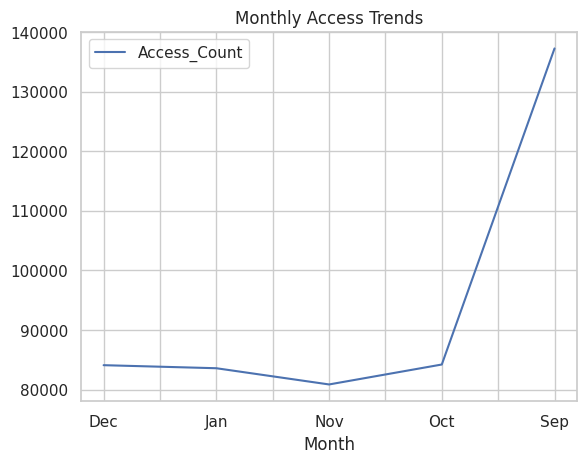

In [347]:
monthly_trends = logs_df.groupby('Month').size().reset_index(name='Access_Count')
monthly_trends.plot(x='Month', y='Access_Count', kind='line', title='Monthly Access Trends')

<Axes: title={'center': 'Access Frequency by Hour'}, xlabel='Hour'>

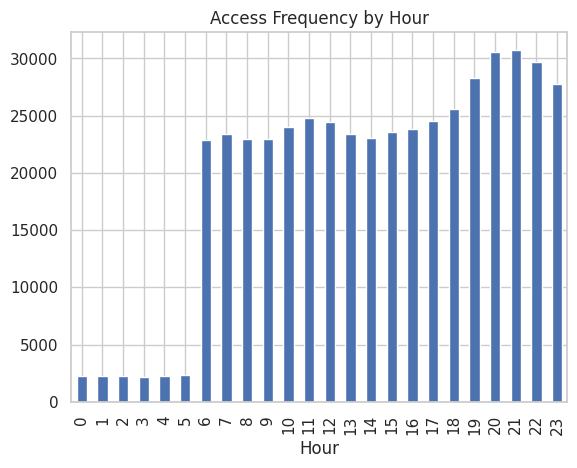

In [348]:
product_trends['Hour'] = product_trends['Date'].dt.hour
product_trends['day_of_week'] = product_trends['Date'].dt.day_name()

# Aggregate to find peak activity
hourly_access = product_trends.groupby('Hour')['Access_Count'].sum()
daily_access = product_trends.groupby('day_of_week')['Access_Count'].sum()

# Visualize patterns
hourly_access.plot(kind='bar', title='Access Frequency by Hour')


<Axes: title={'center': 'Access Frequency by Day of Week'}, xlabel='day_of_week'>

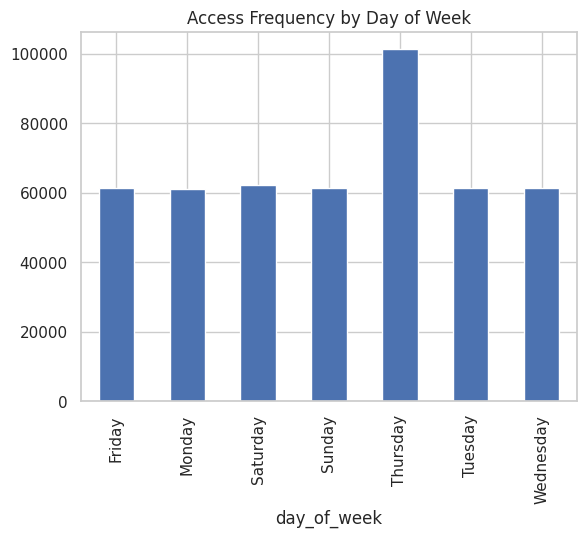

In [349]:
daily_access.plot(kind='bar', title='Access Frequency by Day of Week')

In [350]:
df_inventory

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_date
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,COMPLETE,1360,73,Smart watch,327.750000,0,2018-02-03 22:56:00,Standard Class,CallyHolloway,2018-01-31 22:56:00
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,1360,73,Smart watch,327.750000,0,2018-01-18 12:27:00,Standard Class,IreneLuna,2018-01-13 12:27:00
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,CLOSED,1360,73,Smart watch,327.750000,0,2018-01-17 12:06:00,Standard Class,GillianMaldonado,2018-01-13 12:06:00
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,COMPLETE,1360,73,Smart watch,327.750000,0,2018-01-16 11:45:00,Standard Class,TanaTate,2018-01-13 11:45:00
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,PENDING_PAYMENT,1360,73,Smart watch,327.750000,0,2018-01-15 11:24:00,Standard Class,OrliHendricks,2018-01-13 11:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,CLOSED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 03:40:00,Standard Class,MariaPeterson,2016-01-16 03:40:00
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-19 01:34:00,Second Class,RonaldClark,2016-01-16 01:34:00
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 21:00:00,Standard Class,JohnSmith,2016-01-15 21:00:00
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,PENDING_PAYMENT,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-18 20:18:00,Standard Class,MarySmith,2016-01-15 20:18:00


In [351]:
customer_inven = df_inventory.groupby(['Customer Full Name', 'order_date']).size().reset_index(name='Purchase_Count')

In [352]:
customer_inven

,Customer Full Name,order_date,Purchase_Count
0,AaronBerger,2015-02-02 04:51:00,2
1,AaronBerger,2015-02-04 09:03:00,4
2,AaronBerger,2015-04-23 02:38:00,2
3,AaronBerger,2015-07-14 01:07:00,1
4,AaronBerger,2016-09-06 02:59:00,3
...,...,...,...
65736,ZoritaFisher,2017-11-26 10:46:00,1
65737,ZoritaFrost,2017-11-04 15:42:00,1
65738,ZoritaMcbride,2017-10-14 04:00:00,1
65739,ZoritaMcleod,2018-01-31 03:19:00,1


In [353]:
# df_inventory[(df_inventory["Customer Full Name"] == 'AaronBerger') & (df_inventory['order_date'] == pd.to_datetime('2015-02-02 04:51:00'))]["Order Profit Per Order"]

Processing the df_inventory to basket

In [354]:
df_inventory.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Fu

In [355]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime, timedelta

class ProductRecommender:
    def __init__(self, data):
        # Preprocess and aggregate data
        self.original_data = self._preprocess_dataframe(data)
        self.prepare_data()
    

    def _preprocess_dataframe(self, df):
        # Ensure date columns are datetime
        date_columns = ['order_date', 'shipping_date', 'order date (DateOrders)', 'shipping_date (DateOrders)']
        for col in date_columns:
            if col in df.columns:
                try:
                    df[col] = pd.to_datetime(df[col], errors='coerce')
                except Exception as e:
                    print(f"Could not convert {col} to datetime: {e}")
        
        return df

    def prepare_data(self):
        df = self.original_data.copy()

        # Group data by Order Id (to treat each order as a single unit)
        df_grouped = df.groupby('Order Id').agg({
            'Customer Id': 'first',
            'Product Name': lambda x: list(x),  # List of products in the order
            'Category Name': 'first',  # Assumes all items in the order are from the same category
            'Order Item Quantity': 'sum',  # Sum of quantities for the order
            'Order Item Total': 'sum',  # Sum of total cost for the order
            'order_date': 'first'  # First date of the order (assuming all products share the same date)
        }).reset_index()

        self.customer_purchase_history = df_grouped.groupby('Customer Id').agg({
            'Product Name': 'sum',  # Concatenate all products from the customer's orders
            'Order Item Total': 'sum',  # Sum of total spend for the customer
            'Order Item Quantity': 'sum',  # Sum of total quantity purchased by the customer
        }).reset_index()

        # Prepare TF-IDF vectorizer for product features
        self.tfidf = TfidfVectorizer(stop_words='english')
        self.product_features = self.tfidf.fit_transform(
            self.original_data['Product Name'].value_counts().index.to_list()
        )

        # Prepare product-level details for recommendations
        self.product_details = df.groupby('Product Name').agg({
            'Product Price': 'mean',
            'Category Name': 'first',
            'Order Item Quantity': 'sum',
            'Order Item Total': 'sum',
            'order_date': ['min', 'max']
        }).reset_index()
        # Flatten the multi-level columns
        self.product_details.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in self.product_details.columns.values]
        self.product_details.columns = [
            'Product Name', 'Product Price', 'Category Name', 
            'Total Quantity', 'Total Sales', 
            'First Sale Date', 'Last Sale Date'
        ]
        return self

    def recommend_products(self, customer_id, category=None, reference_date=None, top_n=5):
        if isinstance(reference_date, str):
            reference_date = pd.to_datetime(reference_date)
        elif reference_date is None:
            reference_date = self.original_data['order_date'].max()
    
        try:
            # Find customer's purchase history
            customer_history = self.customer_purchase_history[
                self.customer_purchase_history['Customer Id'] == customer_id
            ]
            
            # If no customer history, provide general recommendations
            if customer_history.empty:
                # Recommend top-selling products in the last 3 months
                recent_df = self.original_data[
                    (self.original_data['order_date'] > (reference_date - timedelta(days=90)))
                ]
                
                if category:
                    recent_df = recent_df[recent_df['Category Name'] == category]
                
                recent_products = recent_df.groupby('Product Name')['Order Item Quantity'].sum()
                recommendations = recent_products.nlargest(top_n).index.tolist()
                return recommendations
            
            # Get customer's previous product purchases
            previous_products = customer_history['Product Name'].iloc[0]
            
            # Filter out products not in the product details DataFrame
            available_previous_products = [
                product for product in previous_products if product in self.product_details['Product Name'].values
            ]
            
            if not available_previous_products:
                print(f"No available previous products in product details for customer {customer_id}.")
                return []
    
            # Calculate similarity between the previous products and all products
            similarities = []
            for prev_product in available_previous_products:
                prev_product_index = self.product_details[
                    self.product_details['Product Name'] == prev_product
                ].index[0]  # Get the first index of the matching product
                
                prev_product_feature = self.product_features[prev_product_index]  # Indexing sparse matrix
                
                # Calculate cosine similarity with all products
                product_similarities = cosine_similarity(
                    prev_product_feature, 
                    self.product_features
                )[0]  # Flattening the result for cosine similarities
                
                similarities.append(product_similarities)
    
            # Aggregate similarities
            avg_similarities = np.mean(similarities, axis=0)
    
            # Apply temporal and category filters
            temporal_mask = (
                (self.product_details['First Sale Date'] > (reference_date - timedelta(days=180))) &
                (self.product_details['First Sale Date'] <= reference_date)
            )
    
            # Apply the category filter
            if category:
                category_mask = (self.product_details['Category Name'] == category)
                combined_mask = temporal_mask & category_mask
            else:
                combined_mask = temporal_mask
    
            # Ensure that the mask aligns with the length of avg_similarities
            if len(avg_similarities) == len(self.product_details):
                avg_similarities[~combined_mask] = 0  # Zero out similarities for products not meeting criteria
            else:
                print(f"Warning: Length of avg_similarities ({len(avg_similarities)}) does not match product details length ({len(self.product_details)})")
    
            # Ensure the recommendations only come from products that match the available product details
            valid_products = self.product_details[combined_mask]
            valid_similarities = avg_similarities[combined_mask]
    
            if len(valid_similarities) == 0:
                print("No valid products match the criteria.")
                return []
    
            # Get top recommendations based on valid_similarities
            top_indices = valid_similarities.argsort()[::-1][:top_n]
            recommendations = valid_products.iloc[top_indices]['Product Name'].tolist()
            
            return recommendations
        
        except Exception as e:
            print(f"Error in recommendation: {e}")
            return []

    def get_customer_profile(self, customer_id):
        """
        Retrieve detailed customer profile
        """
        customer_info = self.original_data[
            self.original_data['Customer Id'] == customer_id
        ].drop_duplicates('Customer Id')
        
        customer_history = self.customer_purchase_history[
            self.customer_purchase_history['Customer Id'] == customer_id
        ]
        
        return {
            'Customer ID': customer_id,
            'Full Name': customer_info['Customer Full Name'].iloc[0] if not customer_info.empty else 'Unknown',
            'Segment': customer_info['Customer Segment'].iloc[0] if not customer_info.empty else 'Unknown',
            'Country': customer_info['Customer Country'].iloc[0] if not customer_info.empty else 'Unknown',
            'First Purchase Date': customer_history['First Purchase Date'].values[0] if not customer_history.empty else None,
            'Last Purchase Date': customer_history['Last Purchase Date'].values[0] if not customer_history.empty else None,
            'Total Purchases': customer_history['Total Spend'].values[0] if not customer_history.empty else 0,
            'Total Quantity': customer_history['Total Quantity'].values[0] if not customer_history.empty else 0
        }
    def recommend_products_by_market(self, market, category=None, reference_date=None, top_n=5):
        """
        Recommend products based on market purchase patterns, using customer-based recommendation logic.
    
        Args:
            market (str): The target market for recommendations.
            category (str, optional): Filter recommendations by category.
            reference_date (datetime or str, optional): The reference date for filtering recent products.
            top_n (int): Number of top products to recommend.
    
        Returns:
            List[str]: List of recommended product names.
        """
        if isinstance(reference_date, str):
            reference_date = pd.to_datetime(reference_date)
        elif reference_date is None:
            reference_date = self.original_data['order_date'].max()

        
        try:
            # Filter data for the specified market
            market_data = self.original_data[self.original_data['Market'] == market]
    
            if market_data.empty:
                print(f"No data available for the market: {market}")
                return []
    
            # Group market-level purchase history
            market_purchase_history = market_data.groupby('Product Name').agg({
                'Order Item Quantity': 'sum',
                'Order Item Total': 'sum'
            }).reset_index()
    
            # Rank products by purchase frequency within the market
            market_purchase_history = market_purchase_history.sort_values(
                by='Order Item Quantity', ascending=False
            )
    
            # If category filter is applied, narrow down the market data
            if category:
                market_data = market_data[market_data['Category Name'] == category]
    
            # Gather features of market-purchased products for similarity calculation
            market_purchased_products = market_purchase_history['Product Name'].tolist()
            available_products = [
                product for product in market_purchased_products if product in self.product_details['Product Name'].values
            ]
    
            if not available_products:
                print(f"No available products in product details for market: {market}.")
                return []
    
            # Calculate similarity between market-purchased products and all products
            similarities = []
            for product in available_products:
                product_index = self.product_details[
                    self.product_details['Product Name'] == product
                ].index[0]
    
                product_feature = self.product_features[product_index]  # Indexing sparse matrix
    
                # Calculate cosine similarity with all products
                product_similarities = cosine_similarity(
                    product_feature,
                    self.product_features
                )[0]  # Flatten the result
    
                similarities.append(product_similarities)
    
            # Aggregate similarities across all products
            avg_similarities = np.mean(similarities, axis=0)
            # Apply temporal and category filters
            temporal_mask = (
                (self.product_details['Last Sale Date'] > (reference_date - timedelta(days=30))) &
                (self.product_details['First Sale Date'] <= reference_date)
            )
            if category:
                category_mask = (self.product_details['Category Name'] == category)
                combined_mask = temporal_mask & category_mask
            else:
                combined_mask = temporal_mask
    
            # Ensure the similarities align with valid products
            if len(avg_similarities) == len(self.product_details):
                avg_similarities[~combined_mask] = 0
            else:
                print(f"Warning: Similarities length mismatch: {len(avg_similarities)} vs {len(self.product_details)}")
    
            # Get valid products
            valid_products = self.product_details[combined_mask]
            valid_similarities = avg_similarities[combined_mask]
    
            if len(valid_similarities) == 0:
                print("No valid products match the criteria for this market.")
                return []
    
            # Get top recommendations
            top_indices = valid_similarities.argsort()[::-1][:top_n]
            recommendations = valid_products.iloc[top_indices]['Product Name'].tolist()
    
            return recommendations
    
        except Exception as e:
            print(f"Error in market-based recommendation: {e}")
            return []

In [356]:
# Instantiate recommender
recommender = ProductRecommender(df_inventory)

# Example usage
customer_id = "JohnSmith"
recommended_products = recommender.recommend_products(customer_id, top_n=10, reference_date='2017-01-01')
print(f"Recommended Products for Customer {customer_id}: {recommended_products}")

Recommended Products for Customer JohnSmith: ['Perfect Fitness Perfect Rip Deck', "Nike Men's Dri-FIT Victory Golf Polo", "O'Brien Men's Neoprene Life Vest", "Nike Men's Free 5.0+ Running Shoe", "Under Armour Girls' Toddler Spine Surge Runni", "Nike Men's CJ Elite 2 TD Football Cleat", 'Field & Stream Sportsman 16 Gun Fire Safe', 'Pelican Sunstream 100 Kayak', "Diamondback Women's Serene Classic Comfort Bi", 'Fighting video games']


In [357]:
# Recommend products for a specific market
market = "USCA"
recommended_market_products = recommender.recommend_products_by_market(market, top_n=10, reference_date= '2017-01-01')
print(f"Recommended Products for Market {market}: {recommended_market_products}")

Recommended Products for Market USCA: ['Bridgestone e6 Straight Distance NFL Tennesse', "Nike Men's Deutschland Weltmeister Winners Bl", 'Bag Boy Beverage Holder', "TYR Boys' Team Digi Jammer", "Glove It Women's Mod Oval Golf Glove", 'Team Golf Texas Longhorns Putter Grip', 'Field & Stream Sportsman 16 Gun Fire Safe', "Hirzl Women's Soffft Flex Golf Glove", 'Team Golf New England Patriots Putter Grip', "Under Armour Women's Ignite PIP VI Slide"]


In [358]:
df_inventory.to_csv("Inventory.csv")

demand prediction
+ X: sales, shipping days, product price ...
+ y: monthly order quantity 